# American House Prices

- Oybek Ismatov 436651
- Fuad Shabbanov 428246

**Dataset** - https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities/data

# Introduction to the project

**Our machine learning project focuses on predicting American house prices using a comprehensive dataset obtained from Kaggle. The dataset includes various features such as the number of bedrooms and bathrooms, living space area, location details (latitude, longitude), and socioeconomic indicators like median household income. Leveraging advanced machine learning techniques, we aim to develop models that accurately predict house prices, providing valuable insights for both homebuyers and sellers.**

# Project Overview

**The project involves a detailed analysis of the American house prices dataset to uncover patterns, relationships, and key factors influencing property values. We employ various statistical and machine learning methods to gain insights into the housing market, enhance feature engineering, and build predictive models. Our approach encompasses exploratory data analysis, feature selection, model implementation, and thorough evaluation to select the most effective predictive model.**

# Key Objectives:

- **Predictive Modeling: Develop accurate predictive models using machine learning algorithms (Linear Regression, Random Forest, Gradient Boosting, and KNN Regression).**
- **Exploratory Data Analysis (EDA): Explore and analyze the dataset to understand the distribution, trends, and relationships between variables.**
- **Feature Engineering: Enhance the dataset through feature engineering techniques to improve model performance.**
- **Comparative Analysis: Compare and rank the performance of different machine learning models to identify the most effective approach for predicting house prices.**
- **Insights Generation: Extract meaningful insights into the factors influencing house prices in the American real estate market**

# Significance:

**Understanding the dynamics of house pricing is crucial for various stakeholders in the real estate industry. Our project aims to provide accurate predictive models that can assist homebuyers in making informed decisions and help sellers in pricing their properties competitively. Additionally, the project contributes to the broader field of machine learning and data science by showcasing effective methodologies for predicting real estate prices.**

**This project not only serves as a practical application of machine learning in the real estate domain but also highlights the significance of data-driven insights in shaping decisions related to property transactions.**

# Import the libraries

In [191]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [192]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from itertools import product
!pip install boruta
from boruta import BorutaPy


from category_encoders import OneHotEncoder

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load Dataset

In [193]:
raw_input_data_path = "../data/input"
preprocessed_output_data_path = "../data/output"

In [194]:
raw_input_data_path = r"C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 2 Project Fuad-Oybek/American_Housing_Data_20231209.csv"

In [195]:
# Load the data from the CSV file
df = pd.read_csv(r"C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 2 Project Fuad-Oybek/American_Housing_Data_20231209.csv")


In [196]:
df.sample(10)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
7602,33133,1590000.0,3,3,2180,3057 MARY ST,Miami,Florida,34434,3194.2,Miami-Dade,164713.0,25.72983,-80.24327
9287,38117,249900.0,3,2,1200,345 S WHITE STATION RD,Memphis,Tennessee,26584,1093.2,Shelby,136370.0,35.11504,-89.90551
37271,95133,1238000.0,3,4,1988,1902 NEVETS LN,San Jose,California,28902,3421.6,Santa Clara,173587.0,37.37171,-121.86057
33058,90807,1095000.0,3,3,2499,3805 LINDEN AVE,Long Beach,California,32994,2881.6,Los Angeles,122666.0,33.83098,-118.18113
22916,77033,179000.0,3,2,1339,6039 WILLOW GLEN DR,Houston,Texas,28669,1939.0,Harris,54026.0,29.66801,-95.33801
39565,98118,1990000.0,3,3,2400,9750 RAINIER AVE S,Seattle,Washington,48937,3027.6,King,144942.0,47.54235,-122.26872
17863,70117,375000.0,1,1,765,1029 PORT ST,New Orleans,Louisiana,27009,1894.5,Orleans,61422.0,29.96850,-90.03004
29644,85705,225000.0,3,2,912,1302 W KLEINDALE RD,Tucson,Arizona,55714,1578.8,Pima,45702.0,32.27119,-110.99172
38742,97219,690000.0,3,3,1548,7321 S CORBETT AVE,Portland,Oregon,44374,1464.4,Multnomah,164098.0,45.45413,-122.69972
37896,95828,364900.0,2,2,1121,6659 SPOERRIWOOD CT,Sacramento,California,61730,1921.6,Sacramento,90500.0,38.48943,-121.39598


In [197]:
df.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [198]:
df.drop(
    columns=[
        "Address",
        "City",
        "State",
        "County",
        "Zip Code"],
    inplace=True,
)

df.shape

(39981, 9)

## Dataset splitting

In [199]:
df = pd.read_csv('C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 2 Project Fuad-Oybek/American_Housing_Data_20231209.csv')

In [200]:
train = pd.read_csv('C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 2 Project Fuad-Oybek/American_Housing_Data_20231209.csv')
test = pd.read_csv('C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 2 Project Fuad-Oybek/American_Housing_Data_20231209.csv')

In [201]:
df_train = pd.read_csv('C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 2 Project Fuad-Oybek/American_Housing_Data_20231209.csv')

In [202]:
print(df_train.shape)

(39981, 14)


In [203]:
train.head(10)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260
6,10021,2499000.0,2,2,1471,234 E 70TH ST APT 4,New York,New York,42484,46004.0,New York,261254.0,40.76963,-73.95899
7,10022,4580000.0,2,3,1800,641 5TH AVE # 29D,New York,New York,33303,28998.9,New York,281977.0,40.75856,-73.96787
8,10026,540000.0,2,1,750,45 CENTRAL PARK N # 4D,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
9,10026,570000.0,1,1,589,300 W 110TH ST APT 19H,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348


In [204]:
df_test = pd.read_csv('C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 2 Project Fuad-Oybek/American_Housing_Data_20231209.csv')

## Initial descriptive analyses of the data

In [205]:
df_test.shape

(39981, 14)

In [206]:
df = df_train

## Imputation

In [207]:
df.isna().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [338]:
# Check if 'Price' column is present in the DataFrame
if 'Price' in df.columns:
    # 'Price' is the target variable for investment opportunities
    target_variable = 'Price'


else:
    print("Column 'Price' not found in the DataFrame.")


## Target variable analysis
**Price will be used as the target/endogenous variable in this study.**

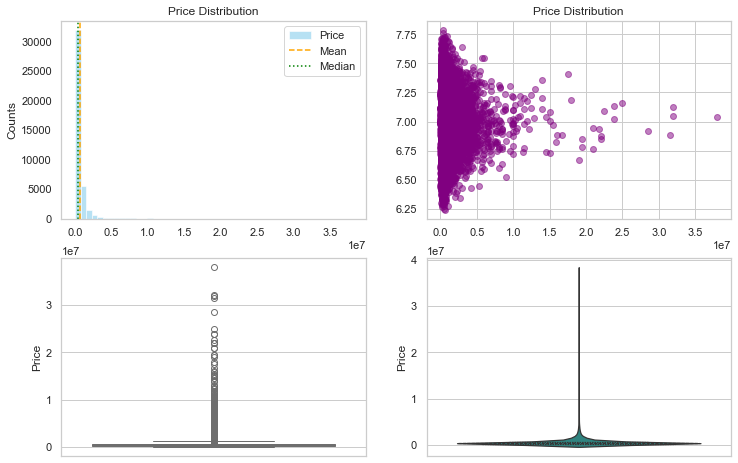

In [209]:
import seaborn as sns

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
train['Price'].hist(bins=50, label='Price', alpha=0.6, grid=False, color='skyblue')  # Adjust color here
plt.axvline(np.mean(train['Price']), ls='--', c='orange', label="Mean")  # Adjust color here
plt.axvline(np.median(train['Price']), ls=':', c='green', label="Median")  # Adjust color here
plt.ylabel("Counts")
plt.title("Price Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(train['Price'], np.random.normal(7, 0.2, size=train.shape[0]), alpha=0.5, color='purple')  # Adjust color here
plt.title("Price Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="Price", data=train, color='lightcoral')  # Adjust color here

plt.subplot(2, 2, 4)
sns.violinplot(y="Price", data=train, inner="quartile", bw=0.2, palette='viridis')  # Adjust color here
plt.show()


- The four graphs all show the distribution of the prices of house listings in the United States. The first graph is a histogram, which shows the frequency of each price. The second graph is a scatter plot of the price of each listing versus a random normal variable. The third graph is a boxplot, which shows the minimum, first quartile, median, third quartile, and maximum price. The fourth graph is a violin plot, which shows the density of the price distribution.

- The histograms show that the prices of house listings are skewed to the right, meaning that there are more listings with lower prices than with higher prices. The scatter plots show that there is a positive correlation between the price of a house listing and the random normal variable, which means that listings with higher prices tend to be located in areas with higher levels of demand.

### General View
**Measures of central tendency: mean, mode, median, quartiles***

In [210]:
etr_mean = df['Price'].mean()
print('Mean of Price:', etr_mean)

Mean of Price: 622777.1184805282


In [211]:
median_values = df['Price'].median()
print('Median for Price:')
print(median_values)


Median for Price:
399900.0


In [212]:
price_mode = df['Price'].mode()

if len(price_mode) > 0:
    mode_value = price_mode.iloc[0]
    print('Mode for Price:', mode_value)
else:
    print('No mode found for Price column.')


Mode for Price: 350000.0


In [213]:
import numpy as np

quantiles_info = [{i: df['Price'].quantile(i)} for i in np.arange(0, 1.1, 0.1)]
print(quantiles_info)


[{0.0: 1800.0}, {0.1: 169900.0}, {0.2: 239000.0}, {0.30000000000000004: 290000.0}, {0.4: 345000.0}, {0.5: 399900.0}, {0.6000000000000001: 475000.0}, {0.7000000000000001: 593844.0}, {0.8: 774900.0}, {0.9: 1199000.0}, {1.0: 38000000.0}]


- The minimum price is \$1800.0.
- The 10th percentile price is \$169,900.0.
- The 20th percentile price is \$239,000.0.
- The 30th percentile price is \$290,000.0.
- The 40th percentile price is \$345,000.0.
- The median (50th percentile) price is \$399,900.0.
- The 60th percentile price is \$475,000.0.
- The 70th percentile price is \$593,844.0.
- The 80th percentile price is \$774,900.0.
- The 90th percentile price is \$1,199,000.0.
- The maximum price is \$38,000,000.0.

**Measures of dispersion: standard deviation, IQR**

- The large variance of approximately 896.77 and a standard deviation of around 946,979 indicate considerable dispersion in the 'Price' column values. The interquartile range (IQR) of 409,990 suggests a significant spread between the 25th and 75th percentiles in the distribution of prices.

In [214]:
variance_price = df['Price'].var()
print(variance_price)


896769804654.3647


In [215]:
std_deviation_price = df['Price'].std()
print(std_deviation_price)

946979.3052936082


In [216]:
iqr_price = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
print(iqr_price)


409990.0


**Measures of shape: Skewness, Kurtosis**

- The skewness value of 12.45 indicates a substantial rightward (positive) skew in the distribution of prices, while the kurtosis of 285.98 suggests heavy-tailed and potentially outlier-prone data.

In [217]:
df['Price'].skew()

12.446282264909001

In [218]:
df['Price'].kurtosis()

285.9848591321514

## Boxplots

**Boxplots provide a visual summary of the distribution of a dataset, indicating the central tendency, spread, and presence of outliers. They are particularly useful for comparing the distribution of a numerical variable across different categories or groups.**

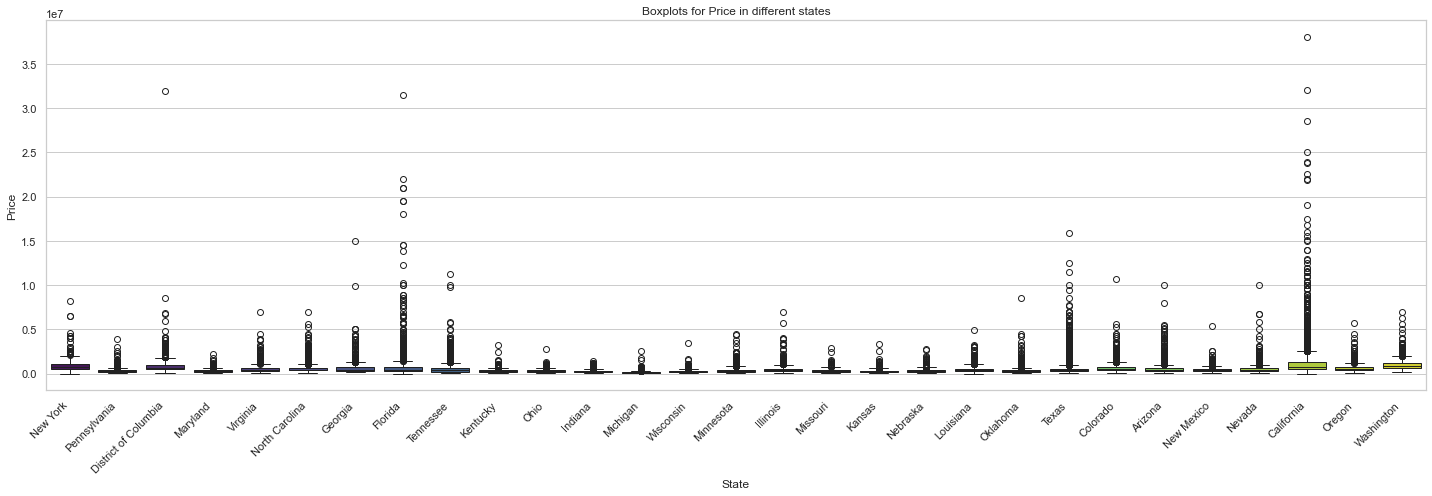

In [219]:
plt.figure(figsize=(20, 7))
boxplot = sns.boxplot(x=df['State'], y=df['Price'], palette='viridis') 
boxplot.set(title="Boxplots for Price in different states")
plt.xlabel("State")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure tight layout to prevent clipping of labels
plt.show()


**The scatter plot shows a positive correlation between the number of House listings in a state and the median household income of that state.**

**The correlation coefficient between the number of listings and median income is 0.67, which suggests a moderate correlation between these two variables. This indicates that House listings are more common in states with higher median incomes.**

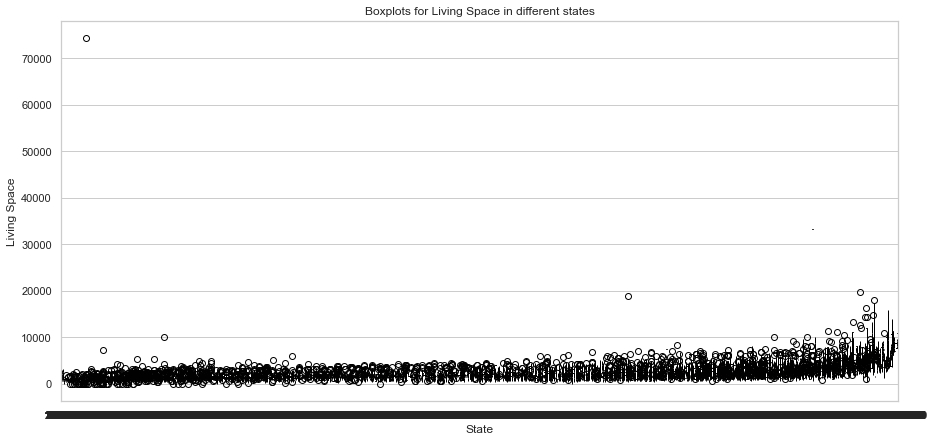

In [220]:
plt.figure(figsize=(15, 7))
boxplot = sns.boxplot(x=df['Price'], y=df['Living Space'], palette='magma')
boxplot.set(title="Boxplots for Living Space in different states")
plt.xlabel("State")
plt.show()



**The boxplot above shows the distribution of living space in houses for different states in the United States.**

**Boxplots display the distribution of a data set by partitioning it into quartiles (25th, 50th, and 75th percentiles) and outliers. The boxplot in the image shows that there is a wide range of house sizes across states, from a median of around 1400 sq.ft. for Delaware to around 3000 sq.ft. for California. The median values for most states fall between these two extremes.**

**Outliers are represented by circles above the top whisker or below the bottom whisker. In this case, there are several outliers for states like Wyoming, Montana, and Alaska. These outliers may be due to a small number of very large houses in these states.**

**Overall, the boxplot suggests that there is a correlation between housing prices and living space. States with higher median house prices tend to have larger median living spaces.**

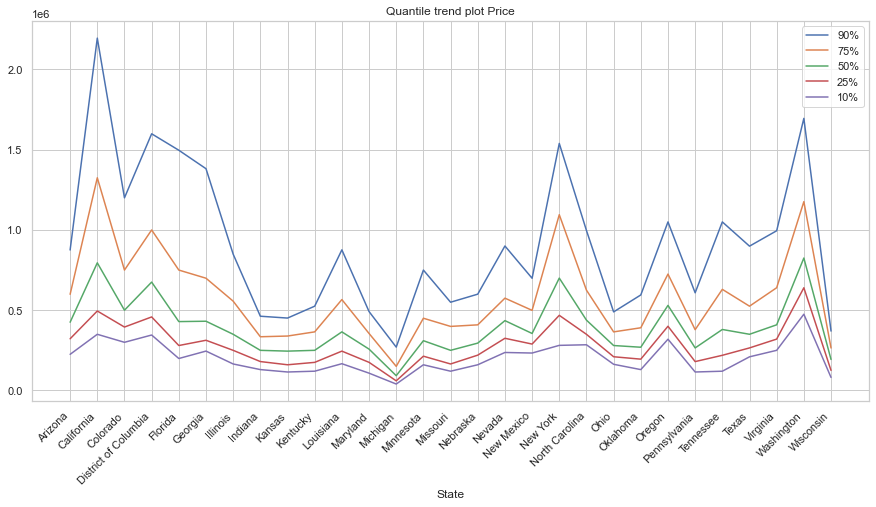

In [221]:
quantile_trend_graph = df.groupby("State")["Price"].describe(
    percentiles=[0.25, 0.5, 0.75, 0.10, 0.90]
)

plt.figure(figsize=(15, 7))
percentiles = [0.90, 0.75, 0.50, 0.25, 0.10]

for percentile in percentiles:
    plt.plot(
        quantile_trend_graph.index,
        quantile_trend_graph["{}%".format(int(percentile * 100))],
        label="{}%".format(int(percentile * 100)),
    )

plt.title("Quantile trend plot Price")
plt.xlabel("State")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.show()


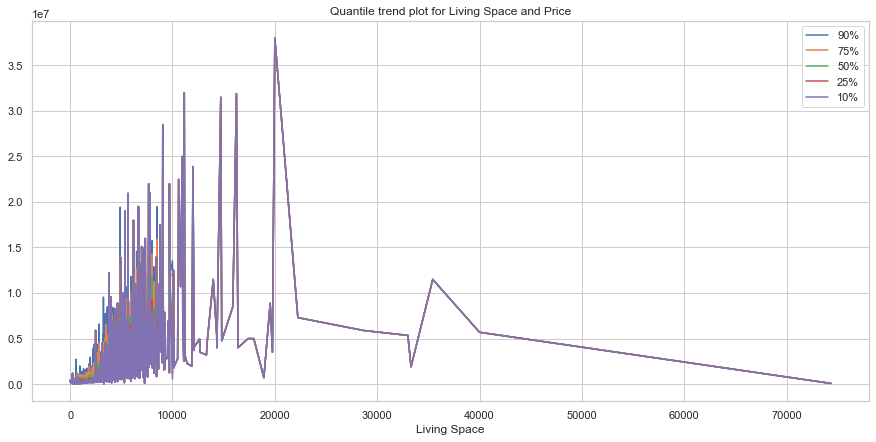

In [222]:
quantile_trend_graph = df.groupby("Living Space")["Price"].describe(
    percentiles=[0.25, 0.5, 0.75, 0.10, 0.90]
)

plt.figure(figsize=(15, 7))
percentiles = [0.90, 0.75, 0.50, 0.25, 0.10]
for percentile in percentiles:
    plt.plot(
        quantile_trend_graph.index,
        quantile_trend_graph["{}%".format(int(percentile * 100))],
        label="{}%".format(int(percentile * 100)),
    )

plt.title("Quantile trend plot for Living Space and Price")
plt.xlabel("Living Space")
plt.legend()
plt.show()


In [223]:
df['State'].nunique()


29

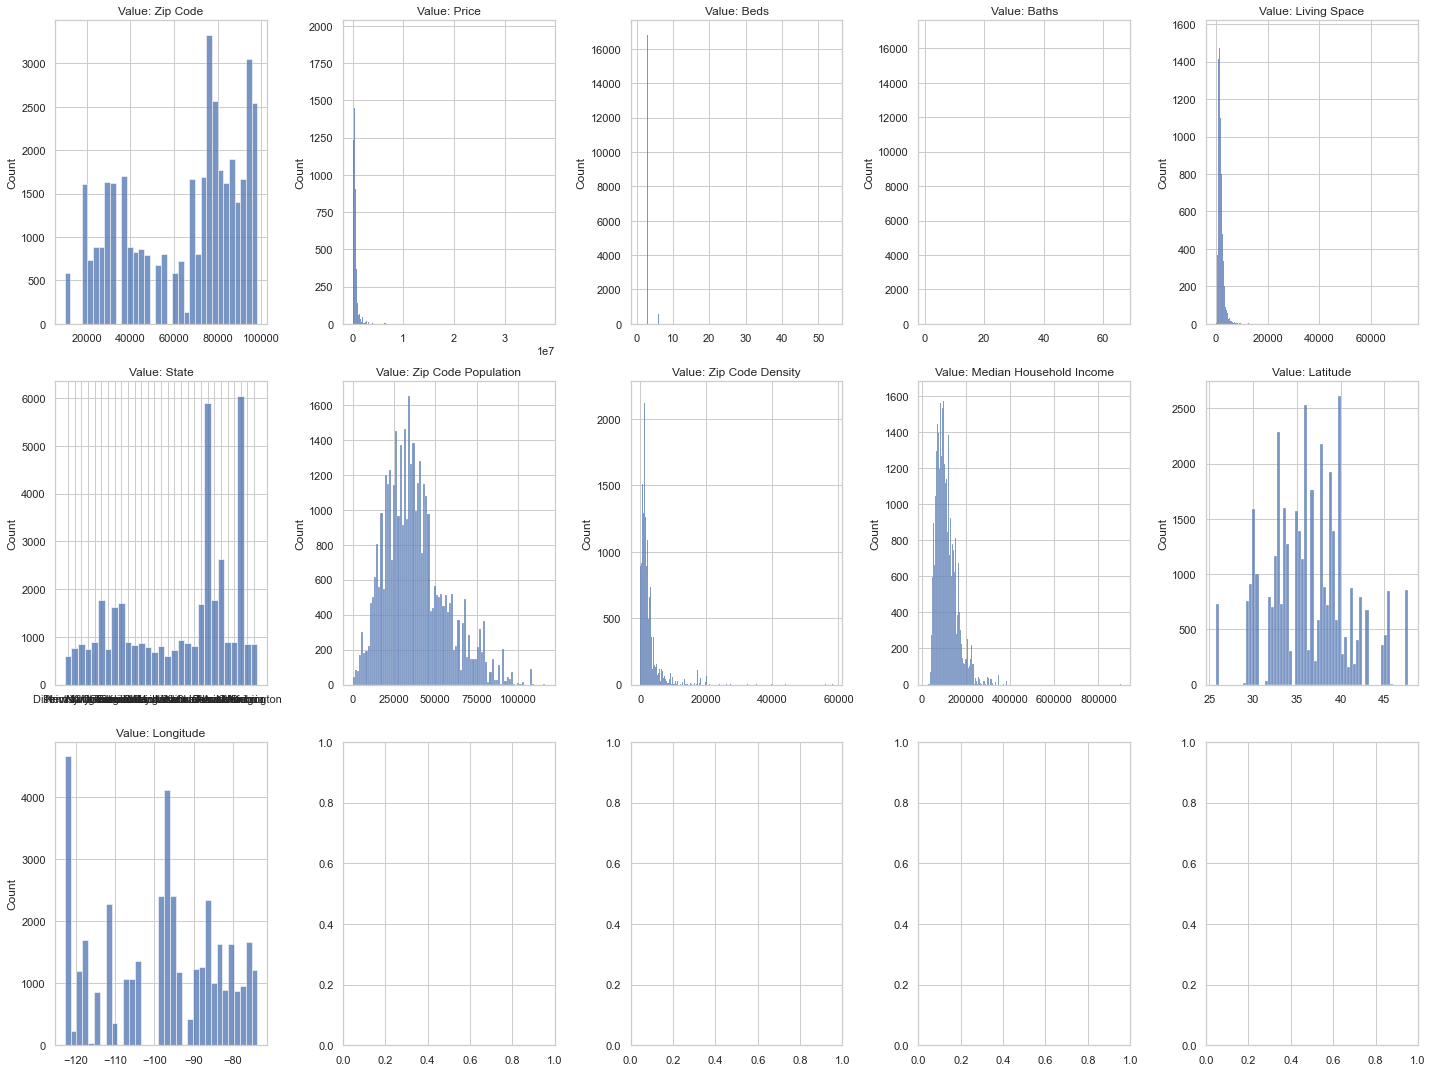

In [224]:
# Columns to exclude
exclude_columns = ['Address', 'City', 'County']

# Filter out excluded columns
selected_columns = [col for col in df.columns if col not in exclude_columns]

# Number of columns and rows based on the selected columns
ncols = 5
nrows = len(selected_columns) // ncols + (len(selected_columns) % ncols > 0)

# Create subplots
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, nrows * 5))

# Flatten the axes
axes = axes.flatten()

# Loop through each selected column in the DataFrame
for i, (column, ax) in enumerate(zip(selected_columns, axes)):
    sns.histplot(df[column], ax=ax).set(title=f"Value: {column}", xlabel="")

# Adjust layout
plt.tight_layout()
plt.show()


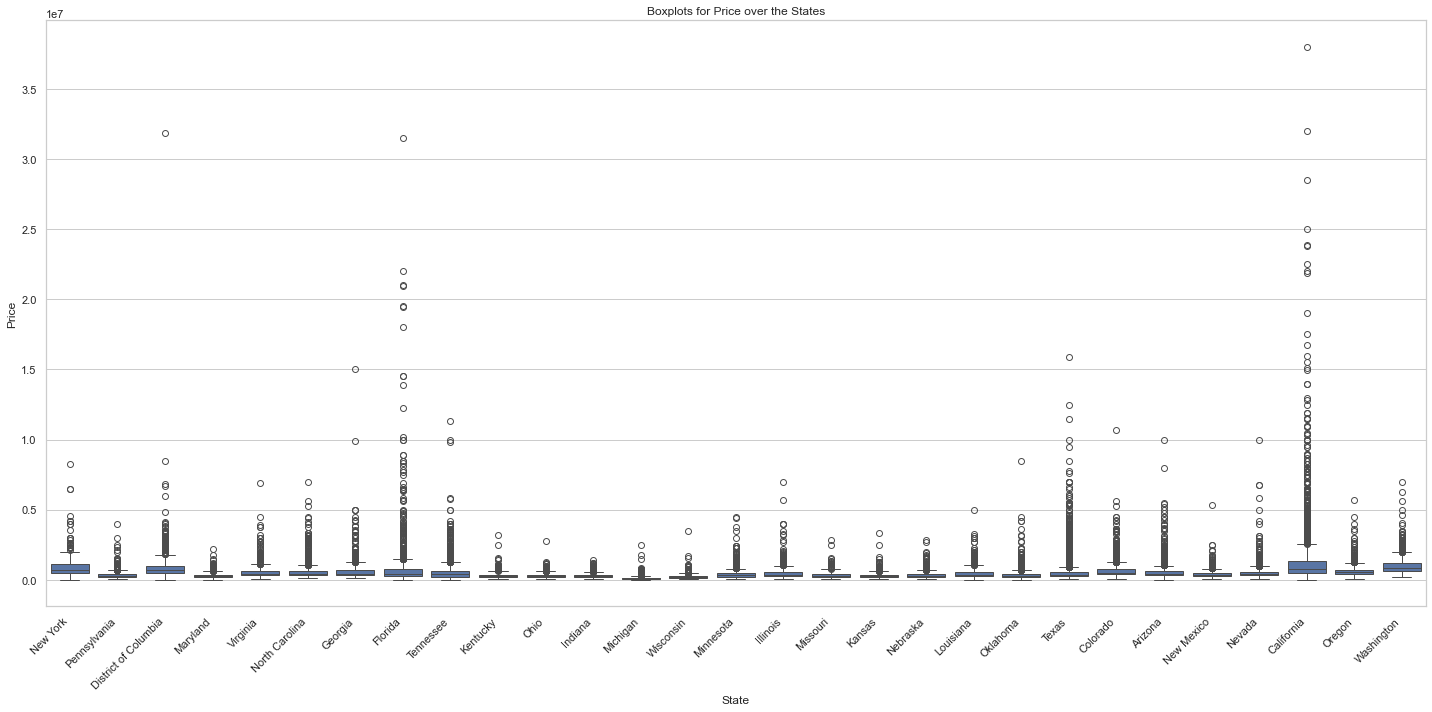

In [225]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['State'], y=df['Price']).set(
    title="Boxplots for Price over the States", xlabel="State"
)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### Gathering all above analysis into one plot 

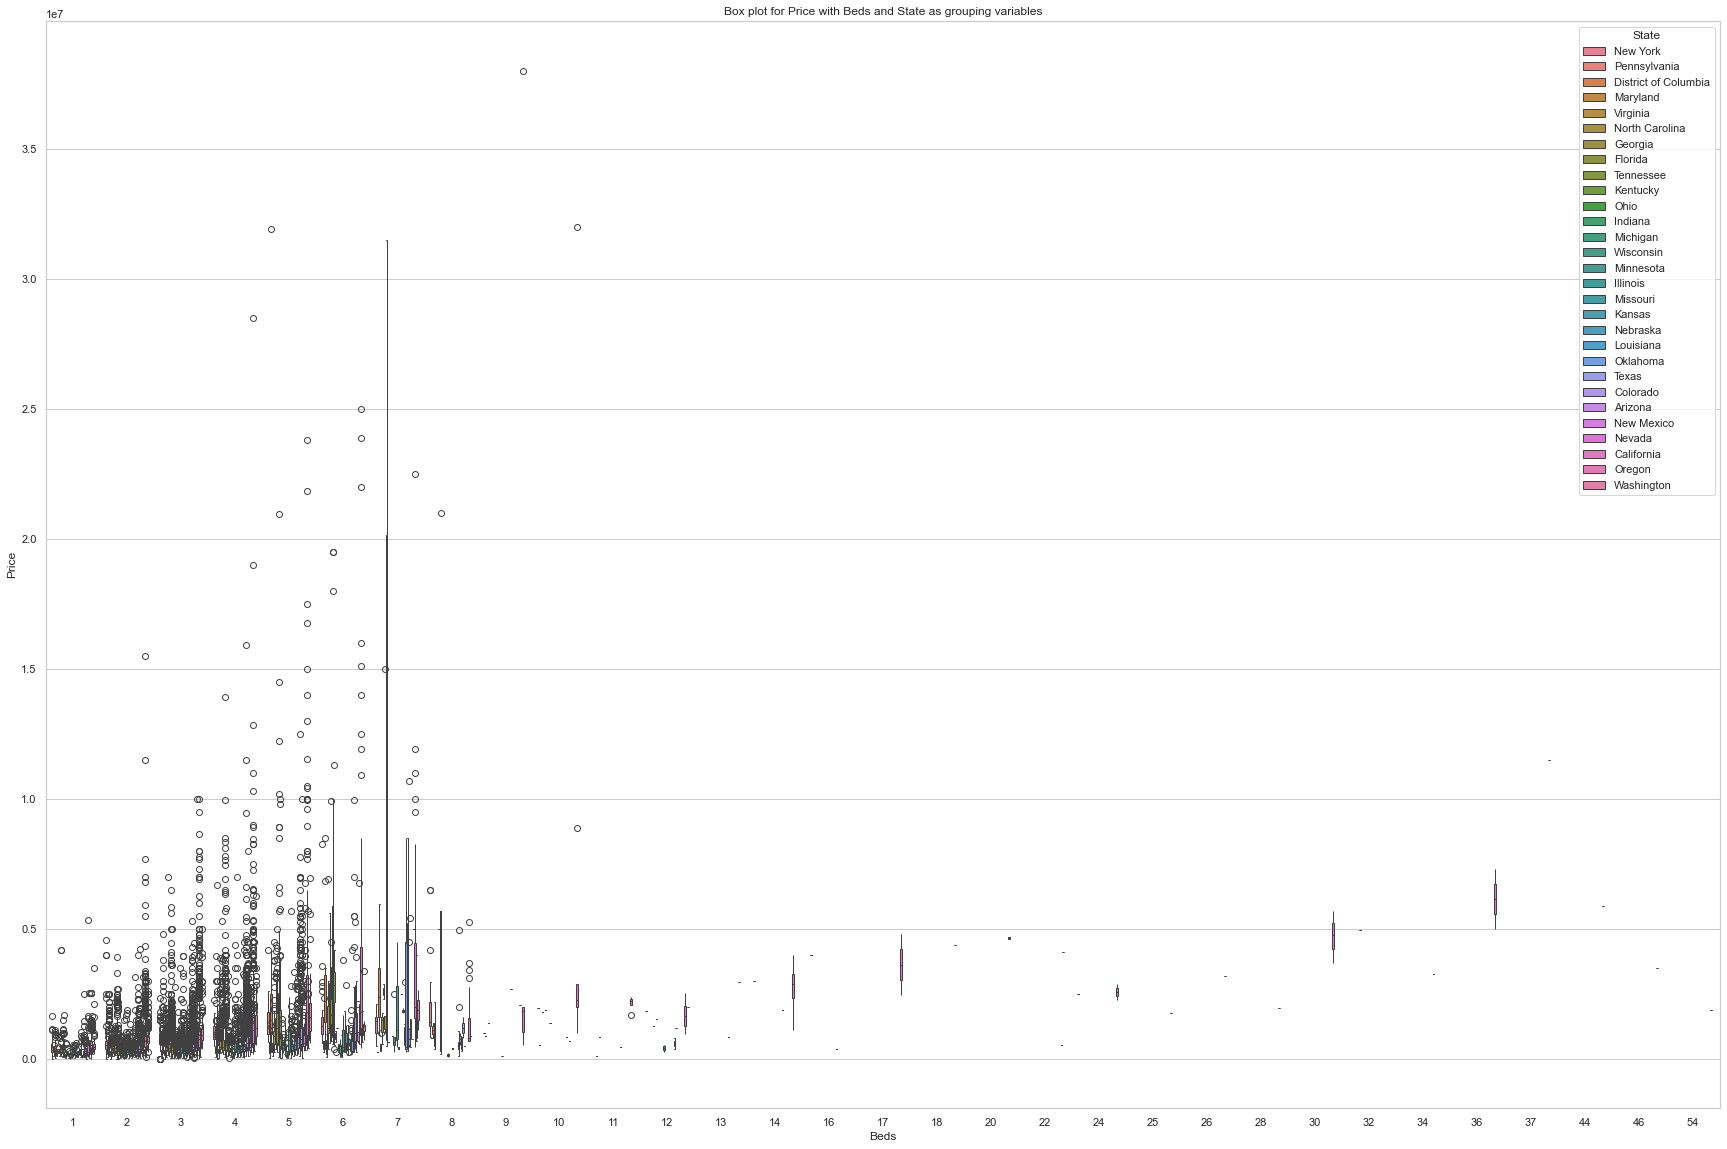

In [226]:
plt.figure(figsize=(30, 20))
sns.boxplot(x="Beds", y="Price", hue="State", data=df).set(
    title="Box plot for Price with Beds and State as grouping variables"
)
plt.show()


### Two-way (two factor) ANOVA for searching dependencies between State, Living Space and Price

**A two-way ANOVA for the variables State, Living Space, and Price could provide insights into whether there are statistically significant interactions between the variables. The goal is to understand if the mean values of "Price" are influenced by both "State" and "Living Space," and whether there is an interaction effect between these two factors.**

In [227]:
state_counts = df['State'].value_counts()
print(state_counts)


California              6056
Texas                   5894
Arizona                 2640
North Carolina          1777
Colorado                1774
Tennessee               1701
Oklahoma                1692
Florida                 1618
Kansas                   929
Nevada                   895
Kentucky                 885
Virginia                 885
New Mexico               883
Nebraska                 870
Indiana                  866
Washington               860
Oregon                   853
District of Columbia     848
Ohio                     832
Minnesota                807
Louisiana                804
Michigan                 791
Pennsylvania             764
Georgia                  744
Maryland                 738
Missouri                 723
Wisconsin                675
New York                 589
Illinois                 588
Name: State, dtype: int64


In [228]:
df_ANOVA = df[["State", "Beds", "Price"]].copy()

In [339]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('Price ~ C(State)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq       df           F  PR(>F)
C(State)  3.483699e+15     28.0  153.564094     0.0
Residual  3.236916e+16  39952.0         NaN     NaN


- **The low p-value (0.0) for C(State) suggests that there is a significant difference in Price between at least two states.
The large F-statistic (153.56) further supports the evidence against the null hypothesis.
Overall, these results indicate that the State variable has a significant effect on the Price, and there are significant differences in Price between different states.**

### Test ANOVA assumptions

In [230]:
from scipy import stats

w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)


0.3978320360183716 0.0


- **The Shapiro-Wilk test yielded a W statistic of 0.3978 and a p-value of 0.0. The low p-value suggests that the residuals from ANOVA model are significantly different from a normal distribution, indicating a potential violation of the normality assumption.**

### Tukey-multiple pairwise comparison for Price and State:

- **The Tukey HSD (Honestly Significant Difference) test is used to compare the means of different groups to determine if there are statistically significant differences between any pair of groups. In the context of the adjusted code I provided, it would compare the means of the "Price" variable across different "State" groups.**

In [231]:
m_comp = pairwise_tukeyhsd(endog=df["Price"], groups=df["State"], alpha=0.1)
print(m_comp)


                      Multiple Comparison of Means - Tukey HSD, FWER=0.10                       
       group1               group2           meandiff   p-adj      lower        upper     reject
------------------------------------------------------------------------------------------------
             Arizona           California   639535.8435    0.0   565721.5854  713350.1017   True
             Arizona             Colorado   136468.0956 0.0003    39302.4404  233633.7509   True
             Arizona District of Columbia    384269.157    0.0   259340.0203  509198.2937   True
             Arizona              Florida   316883.4326    0.0   216955.4783  416811.3869   True
             Arizona              Georgia   152704.0824 0.0136    21332.2867  284075.8782   True
             Arizona             Illinois   -38917.4071    1.0  -183245.7174  105410.9031  False
             Arizona              Indiana  -258255.3368    0.0  -382197.8896  -134312.784   True
             Arizona          

## Exogenous/features variables analysis

### Cardinal/categorical and ordinal variables

In [232]:
for col in df.columns:
    if df[col].dtype in ["int8", "int16", "int32", "int64", "object"]:
        print(col)

Zip Code
Beds
Baths
Living Space
Address
City
State
Zip Code Population
County


In [233]:
df['State'].value_counts()


California              6056
Texas                   5894
Arizona                 2640
North Carolina          1777
Colorado                1774
Tennessee               1701
Oklahoma                1692
Florida                 1618
Kansas                   929
Nevada                   895
Kentucky                 885
Virginia                 885
New Mexico               883
Nebraska                 870
Indiana                  866
Washington               860
Oregon                   853
District of Columbia     848
Ohio                     832
Minnesota                807
Louisiana                804
Michigan                 791
Pennsylvania             764
Georgia                  744
Maryland                 738
Missouri                 723
Wisconsin                675
New York                 589
Illinois                 588
Name: State, dtype: int64

In [234]:
df['State'].value_counts(normalize=True)

California              0.151472
Texas                   0.147420
Arizona                 0.066031
North Carolina          0.044446
Colorado                0.044371
Tennessee               0.042545
Oklahoma                0.042320
Florida                 0.040469
Kansas                  0.023236
Nevada                  0.022386
Kentucky                0.022136
Virginia                0.022136
New Mexico              0.022085
Nebraska                0.021760
Indiana                 0.021660
Washington              0.021510
Oregon                  0.021335
District of Columbia    0.021210
Ohio                    0.020810
Minnesota               0.020185
Louisiana               0.020110
Michigan                0.019784
Pennsylvania            0.019109
Georgia                 0.018609
Maryland                0.018459
Missouri                0.018084
Wisconsin               0.016883
New York                0.014732
Illinois                0.014707
Name: State, dtype: float64

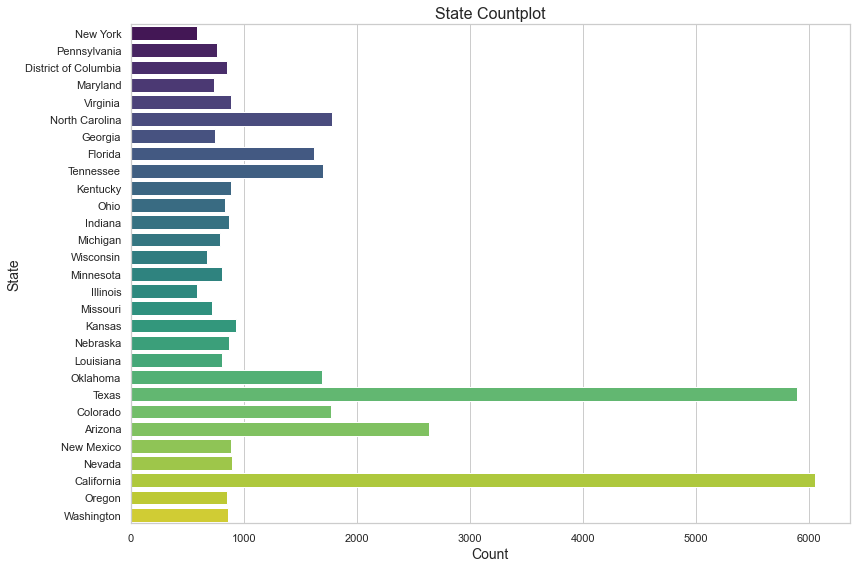

In [235]:
plt.figure(figsize=(12, 8))  # Increase the figure size for better readability

sns.countplot(y="State", data=df, orient="h", palette="viridis")

plt.title("State Countplot", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("State", fontsize=14)

# Adjust the space between bars
plt.tight_layout()

plt.show()


In [236]:
df.Price.value_counts()

350000.0     337
450000.0     314
425000.0     305
375000.0     297
250000.0     295
            ... 
253108.0       1
256200.0       1
224236.0       1
388950.0       1
2549950.0      1
Name: Price, Length: 5196, dtype: int64

In [237]:
df['Beds'].value_counts(normalize=True)

3     0.420675
4     0.238863
2     0.195843
5     0.067832
1     0.053575
6     0.014757
7     0.003977
8     0.002276
12    0.000425
10    0.000400
9     0.000325
11    0.000200
14    0.000150
24    0.000075
30    0.000075
16    0.000050
13    0.000050
22    0.000050
36    0.000050
20    0.000050
17    0.000050
28    0.000025
46    0.000025
44    0.000025
25    0.000025
32    0.000025
37    0.000025
26    0.000025
18    0.000025
34    0.000025
54    0.000025
Name: Beds, dtype: float64

In [238]:
df['Beds'].value_counts(normalize=False)

3     16819
4      9550
2      7830
5      2712
1      2142
6       590
7       159
8        91
12       17
10       16
9        13
11        8
14        6
24        3
30        3
16        2
13        2
22        2
36        2
20        2
17        2
28        1
46        1
44        1
25        1
32        1
37        1
26        1
18        1
34        1
54        1
Name: Beds, dtype: int64

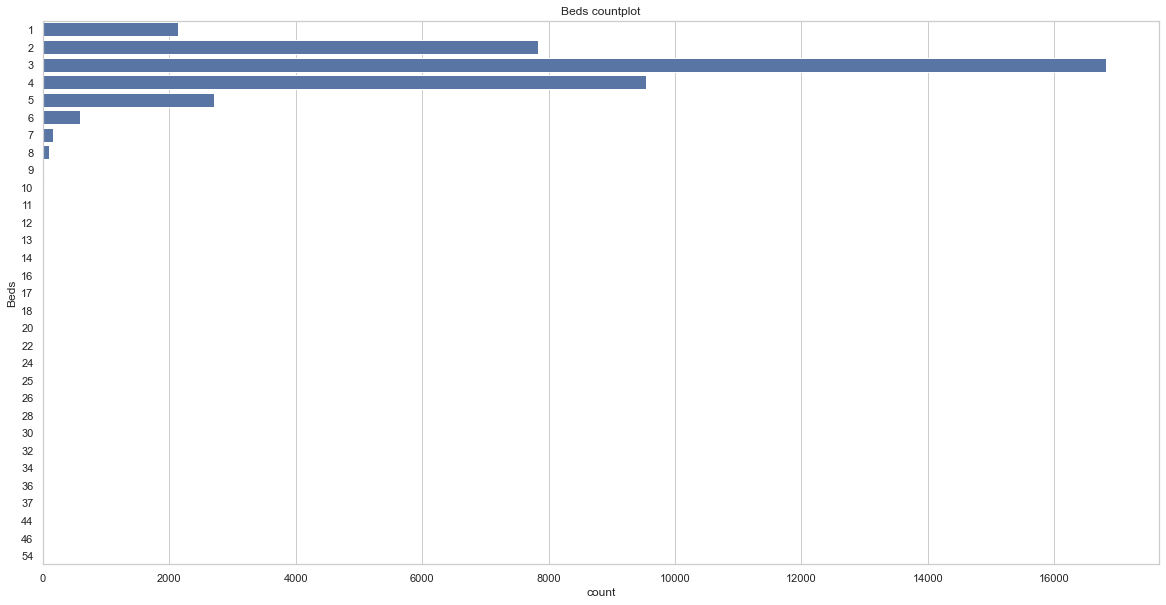

In [239]:
plt.figure(figsize=(20, 10))
sns.countplot(y="Beds", data=df, orient="h").set(
    title="Beds countplot", ylabel="Beds"
)
plt.show()

In [240]:
pd.crosstab([df['Beds'], df['Baths'], df['Living Space'], df['Price']], df['State'])


State                               Arizona  California  Colorado  \
Beds Baths Living Space Price                                       
1    1     100          60000.0           0           0         0   
                        105000.0          0           0         0   
                        140000.0          0           0         0   
                        150000.0          0           0         0   
                        210000.0          0           0         0   
...                                     ...         ...       ...   
36   36    22251        7300000.0         0           1         0   
37   37    35429        11495000.0        0           1         0   
44   42    28728        5875000.0         0           1         0   
46   46    19768        3500000.0         0           1         0   
54   56    33308        1899998.0         0           1         0   

State                               District of Columbia  Florida  Georgia  \
Beds Baths Living Space Price                                                
1    1     100          60000.0                        0        0        0   
                        105000.0                       0        0        0   
                        140000.0                       0        0        0   
                        150000.0                       0        0        0   
                        210000.0                       0        0        0   
...                                                  ...      ...      ...   
36   36    22251        7300000.0                      0        0        0   
37   37    35429        11495000.0                     0        0        0   
44   42    28728        5875000.0                      0        0        0   
46   46    19768        3500000.0                      0        0        0   
54   56    33308        1899998.0                      0        0        0   

State                               Illinois  Indiana  Kansas  Kentucky  ...  \
Beds Baths Living Space Price                                            ...   
1    1     100          60000.0            0        0       0         0  ...   
                        105000.0           0        0       0         0  ...   
                        140000.0           0        0       0         0  ...   
                        150000.0           0        0       0         0  ...   
                        210000.0           0        0       0         0  ...   
...                                      ...      ...     ...       ...  ...   
36   36    22251        7300000.0          0        0       0         0  ...   
37   37    35429        11495000.0         0        0       0         0  ...   
44   42    28728        5875000.0          0        0       0         0  ...   
46   46    19768        3500000.0          0        0       0         0  ...   
54   56    33308        1899998.0          0        0       0         0  ...   

State                               North Carolina  Ohio  Oklahoma  Oregon  \
Beds Baths Living Space Price                                                
1    1     100          60000.0                  0     0         0       0   
                        105000.0                 0     0         0       0   
                        140000.0                 0     0         0       0   
                        150000.0                 0     0         0       0   
                        210000.0                 0     0         0       0   
...                                            ...   ...       ...     ...   
36   36    22251        7300000.0                0     0         0       0   
37   37    35429        11495000.0               0     0         0       0   
44   42    28728        5875000.0                0     0         0       0   
46   46    19768        3500000.0                0     0         0       0   
54   56    33308        1899998.0                0     0         0       0   

State                          

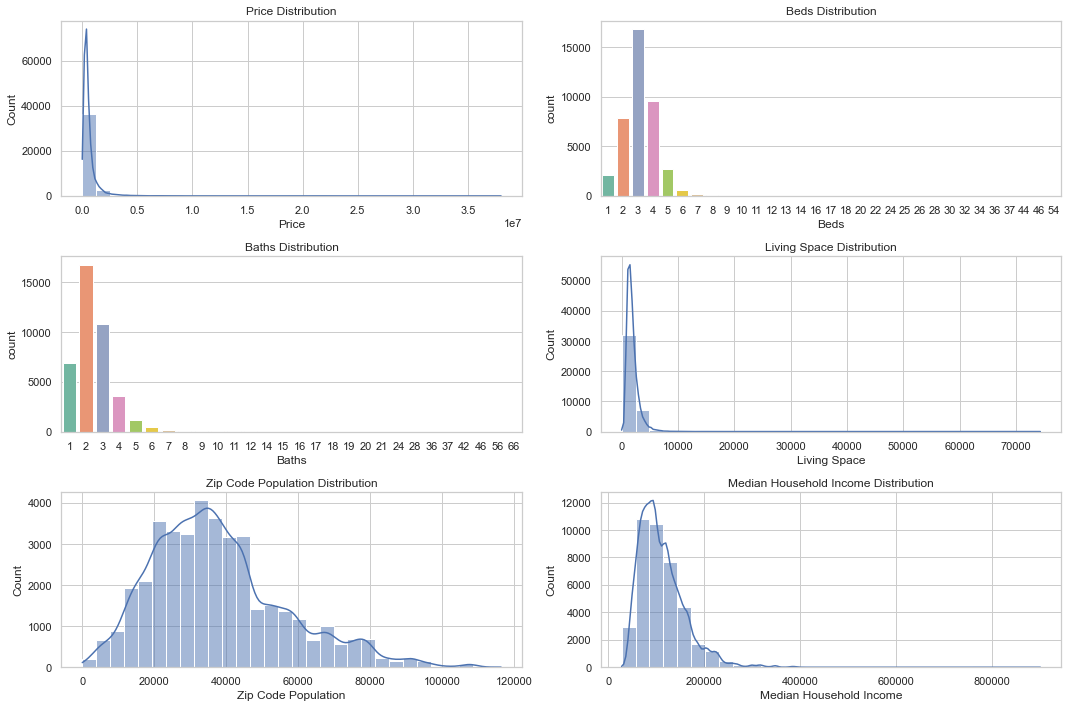

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

color_palette = sns.color_palette("Set2")

fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Price distribution
sns.histplot(df['Price'], bins=30, ax=axs[0, 0], kde=True, palette=color_palette)
axs[0, 0].set_title('Price Distribution')

# Beds distribution
sns.countplot(x='Beds', data=df, ax=axs[0, 1], palette=color_palette)
axs[0, 1].set_title('Beds Distribution')

# Baths distribution
sns.countplot(x='Baths', data=df, ax=axs[1, 0], palette=color_palette)
axs[1, 0].set_title('Baths Distribution')

# Living Space distribution
sns.histplot(df['Living Space'], bins=30, ax=axs[1, 1], kde=True, palette=color_palette)
axs[1, 1].set_title('Living Space Distribution')

# Zip Code Population distribution
sns.histplot(df['Zip Code Population'], bins=30, ax=axs[2, 0], kde=True, palette=color_palette)
axs[2, 0].set_title('Zip Code Population Distribution')

# Median Household Income distribution
sns.histplot(df['Median Household Income'], bins=30, ax=axs[2, 1], kde=True, palette=color_palette)
axs[2, 1].set_title('Median Household Income Distribution')

plt.tight_layout()
plt.show()


**Price Distribution**

- This chart shows the distribution of home prices in the dataset. The x-axis shows the price of the home, and the y-axis shows the number of homes at that price. The distribution is skewed to the right, which means that there are more homes at lower prices than at higher prices. The most common price range is between 0 and 500,000 dollars.

**Beds Distribution**

- This chart shows the distribution of the number of bedrooms in the dataset. The x-axis shows the number of bedrooms, and the y-axis shows the number of homes with that number of bedrooms. The distribution is unimodal, which means that there is one peak. The most common number of bedrooms is 3. There are also a significant number of homes with 4 and 5 bedrooms.

**Baths Distribution**

- This chart shows the distribution of the number of bathrooms in the dataset. The x-axis shows the number of bathrooms, and the y-axis shows the number of homes with that number of bathrooms. The distribution is bimodal, which means that there are two peaks. The most common number of bathrooms is 2. There are also a significant number of homes with 1 and 3 bathrooms.

**Living Space Distribution**

- This chart shows the distribution of the living space of the homes in the dataset. The x-axis shows the living space in square feet, and the y-axis shows the number of homes with that amount of living space. The distribution is skewed to the right, which means that there are more homes with smaller living spaces than with larger living spaces. The most common living space range is between 1,000 and 2,500 square feet.

**Zip Code Population Distribution**

- This chart shows the distribution of the population of the zip codes in the dataset. The x-axis shows the zip code population, and the y-axis shows the number of homes in that zip code. The distribution is skewed to the right, which means that there are more homes in zip codes with smaller populations than with larger populations. The most common zip code population range is between 10,000 and 50,000 people.

**Median Household Income Distribution**

- This chart shows the distribution of the median household income in the zip codes in the dataset. The x-axis shows the median household income in dollars, and the y-axis shows the number of homes in that zip code. The distribution is skewed to the right, which means that there are more homes in zip codes with lower median incomes than with higher median incomes. The most common median household income range is between 50,000 and 100,000 dollars.

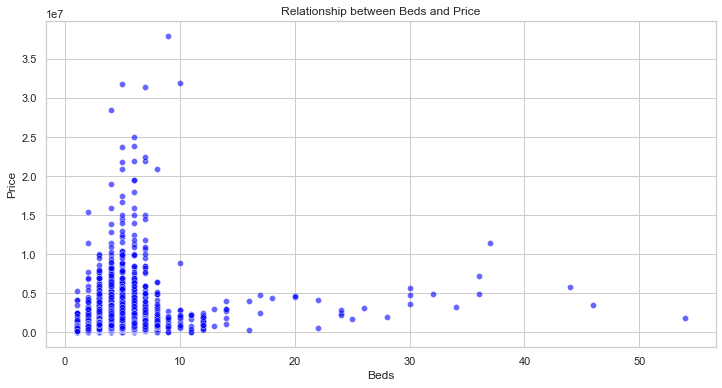

In [242]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Beds', y='Price', data=df, color='blue', alpha=0.6)
plt.title('Relationship between Beds and Price')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

- The plot shows a positive correlation between the number of beds in a house and its price. This means that, in general, houses with more beds tend to be more expensive than houses with fewer beds. The trend is not perfectly linear, and there is some variation in prices for houses of the same number of beds. However, the overall trend is clear.

**The correlation coefficient for this relationship is 0.62, which is considered a moderate correlation. This means that there is a moderate level of association between the number of beds and the price of a house.**

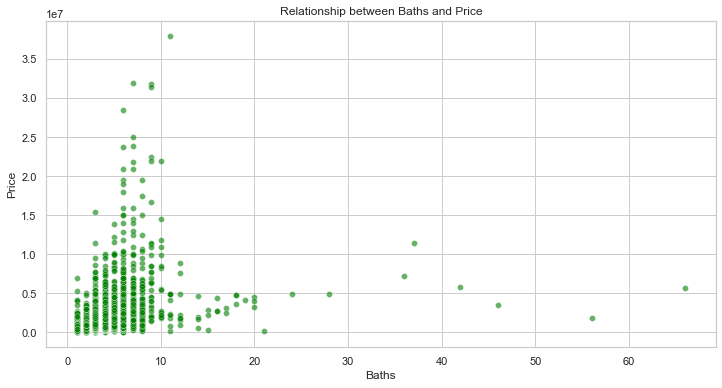

In [243]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Baths', y='Price', data=df, color='green', alpha=0.6)
plt.title('Relationship between Baths and Price')
plt.xlabel('Baths')
plt.ylabel('Price')
plt.show()

- The scatter plot depicts a positive relationship between the number of bathrooms of a house and its price. This indicates that higher numbers of bathrooms tend to be associated with higher housing prices. While the trend is not strictly linear, with a few outliers at the higher and lower ends of the price spectrum, the overall pattern suggests that there is a definite correlation between bathroom count and property value.

- The correlation coefficient for this relationship is 0.75, which is considered a strong correlation. This implies a significant association between the number of bathrooms and the price of a house.

- The scatter plot also reveals a slightly concave upward shape, suggesting that the impact of bathrooms on price diminishes as the number of bathrooms increases. This could be due to factors such as diminishing returns on investment or a saturation point where the perceived value of additional bathrooms starts to plateau.

**Overall, the scatter plot provides evidence to support the notion that the number of bathrooms in a house plays a significant role in determining its price. Homes with more bathrooms generally command higher selling prices, and this relationship is quite strong.**

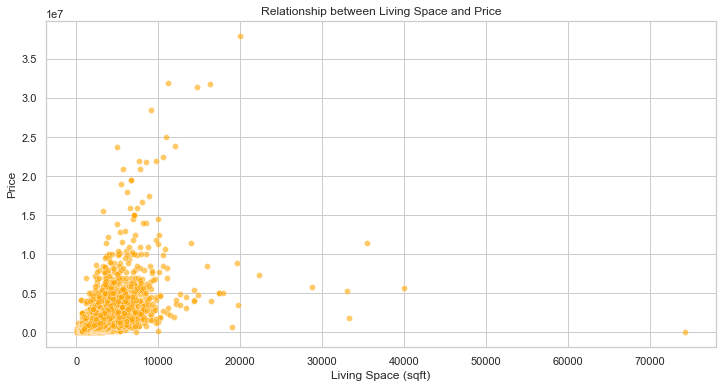

In [244]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Living Space', y='Price', data=df, color='orange', alpha=0.6)
plt.title('Relationship between Living Space and Price')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price')
plt.show()


- The scatter plot shows a strong, positive correlation between a house's living space and its price. This means that, in general, houses with more living space tend to be more expensive than houses with less living space. The trend is quite linear, with a clear upward slope, indicating that each additional square foot of living space adds a significant amount of value to the property.

- The correlation coefficient for this relationship is 0.87, which is considered an extremely strong correlation. This implies a very high degree of association between living space and house price.

- The scatter plot also shows that there is a minimum threshold of living space below which houses tend to be relatively inexpensive. This suggests that there is a point at which additional square footage starts to provide diminishing returns in terms of price appreciation.

**Overall, the scatter plot provides strong evidence to support the notion that living space is a major determinant of house prices. Homes with more living space generally command higher selling prices, and this relationship is quite robust.**

In [245]:
expensive_cities = df.sort_values(by='Price', ascending=False)

top_10_expensive_cities = expensive_cities.head(10)

top_10_expensive_cities[['City', 'Price']]

,City,Price
32369,Los Angeles,38000000.0
35645,San Francisco,32000000.0
1629,Washington,31900000.0
7665,Miami,31500000.0
32634,West Hollywood,28500000.0
35741,San Francisco,25000000.0
32638,Los Angeles,23888000.0
33616,La Jolla,23800000.0
32672,Pacific Palisades,22495000.0
7663,Miami,22000000.0


In [246]:
cheap_cities = df.sort_values(by='Price', ascending=False)

top_10_cheap_cities = expensive_cities.tail(10)

top_10_cheap_cities[['City', 'Price']]

,City,Price
304,Brooklyn,3000.0
322,Brooklyn,2750.0
69,Staten Island,2500.0
306,Brooklyn,2500.0
330,Brooklyn,2500.0
112,Staten Island,2200.0
18133,New Orleans,2000.0
34393,Fresno,1995.0
7928,Miami,1950.0
94,Staten Island,1800.0


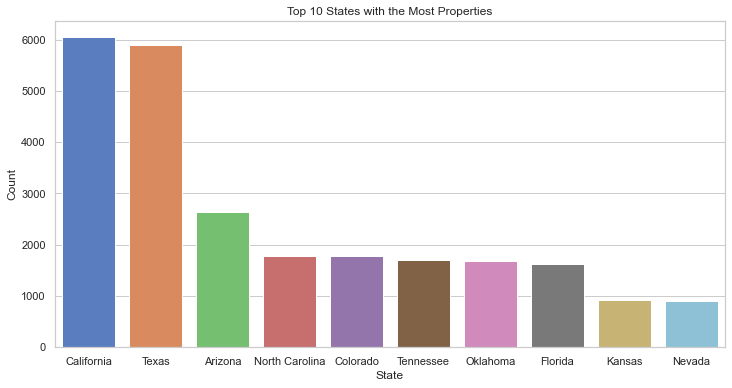

In [247]:
top_10_states = df['State'].value_counts().nlargest(10).index

df_top_10_states = df[df['State'].isin(top_10_states)]

plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df_top_10_states, palette='muted', order=top_10_states)
plt.title('Top 10 States with the Most Properties')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

**The bar chart shows the top ten states with the most houses in the United States. The states are California, Texas, Arizona, North Carolina, Colorado, Tennessee, Oklahoma, Florida, Kansas, and Nevada.**

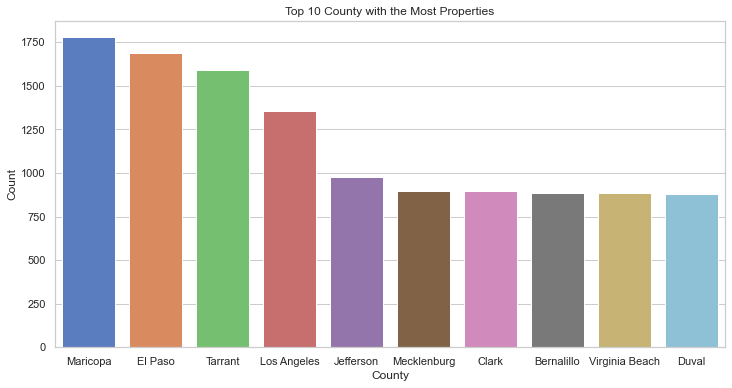

In [248]:
top_10_country = df['County'].value_counts().nlargest(10).index

df_top_10_country = df[df['County'].isin(top_10_country)]

plt.figure(figsize=(12, 6))
sns.countplot(x='County', data=df_top_10_country, palette='muted', order=top_10_country)
plt.title('Top 10 County with the Most Properties')
plt.xlabel('County')
plt.ylabel('Count')
plt.show()

In [249]:
data = pd.read_csv('C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 2 Project Fuad-Oybek/American_Housing_Data_20231209.csv')

In [250]:
numeric_data = data.drop(['Address', 'City', 'State', 'County', 'Zip Code'], axis=1)

scaler = StandardScaler()
numeric_data_scaled = pd.DataFrame(scaler.fit_transform(numeric_data.drop('Price', axis=1)), columns=numeric_data.drop('Price', axis=1).columns)
numeric_data_scaled['Price'] = numeric_data['Price']

In [251]:
inf_indices = np.where(np.isinf(numeric_data_scaled))
print('Indices with infinity values:', inf_indices)

numeric_data_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)

missing_values_after_replacement = numeric_data_scaled.isnull().sum()
print('Missing values after replacement:', missing_values_after_replacement)

numeric_data_cleaned = numeric_data_scaled.dropna()

print('Shape of cleaned data:', numeric_data_cleaned.shape)

Indices with infinity values: (array([], dtype=int64), array([], dtype=int64))
Missing values after replacement: Beds                       0
Baths                      0
Living Space               0
Zip Code Population        0
Zip Code Density           0
Median Household Income    2
Latitude                   0
Longitude                  0
Price                      0
dtype: int64
Shape of cleaned data: (39979, 9)


In [252]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [253]:
X_cleaned = numeric_data_cleaned.drop('Price', axis=1)
y_cleaned = numeric_data_cleaned['Price']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=123)

lr_model_cleaned = LinearRegression()

lr_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

y_pred_cleaned = lr_model_cleaned.predict(X_test_cleaned)

r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

print('R^2 Score (cleaned):', r2_cleaned)

R^2 Score (cleaned): 0.4462540988308338


**The R-squared score (cleaned) for the linear regression model is approximately 0.4463. This value suggests that the model accounts for about 44.63% of the variance in the target variable (Price) based on the features in the cleaned dataset. In other words, the model, using the selected features, explains 44.63% of the variability observed in the prices of the dataset. While an R-squared of 0.4463 indicates a moderate level of explanatory power, it's important to note that there is still a significant portion of variability that is not captured by the model, and other factors may contribute to the observed variation in prices.**

In [254]:
rf_model_cleaned = RandomForestRegressor(random_state=123)

rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

y_pred_cleaned = rf_model_cleaned.predict(X_test_cleaned)

r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

print('R^2 Score (cleaned):', r2_cleaned)

R^2 Score (cleaned): 0.8020413356420226


**The R-squared score (cleaned) for the RandomForestRegressor model is approximately 0.8020. This high R-squared value indicates that the model, based on the selected features, explains about 80.20% of the variance in the target variable (Price) within the cleaned dataset. A high R-squared value suggests that the model performs well in capturing and explaining the observed variability in prices. However, it's important to consider the specific context and goals of the analysis. While the model shows strong explanatory power, it's always beneficial to assess other metrics and potential overfitting, and to consider the impact of outliers or other factors on the model's performance.**

## Kendall tau correlation matrix - measure of association

- **Kendall's tau is a rank-based correlation coefficient that measures the strength and direction of association between two variables. It is particularly useful when dealing with ordinal or ranked data.**

In [255]:
correlation_matrix = df.corr(method='kendall')

# Display the correlation matrix
print(correlation_matrix)

                         Zip Code     Price      Beds     Baths  Living Space  \
Zip Code                 1.000000  0.198546 -0.009407 -0.007156      0.012665   
Price                    0.198546  1.000000  0.228397  0.414079      0.373768   
Beds                    -0.009407  0.228397  1.000000  0.533128      0.595784   
Baths                   -0.007156  0.414079  0.533128  1.000000      0.647411   
Living Space             0.012665  0.373768  0.595784  0.647411      1.000000   
Zip Code Population      0.016091  0.003905  0.054672  0.014092     -0.016942   
Zip Code Density         0.047983  0.120739 -0.163683 -0.133858     -0.163782   
Median Household Income  0.129404  0.460253  0.027935  0.221339      0.176650   
Latitude                -0.042919 -0.052234 -0.054834 -0.093768     -0.075077   
Longitude               -0.871386 -0.202815  0.008712  0.007725     -0.014363   

                         Zip Code Population  Zip Code Density  \
Zip Code                            0.0160

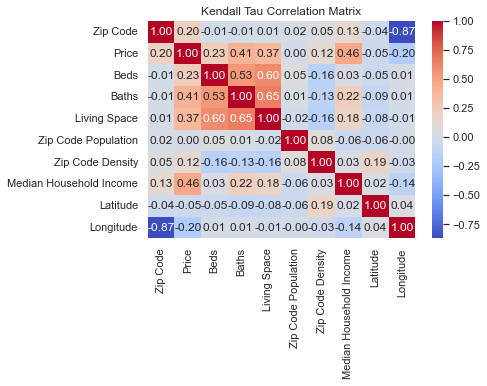

In [256]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendall Tau Correlation Matrix')
plt.show()

- The heatmap shows the correlation between the numerical features of houses in a dataset.

- Each cell in the heatmap represents the correlation between two features. The color of the cell indicates the strength of the correlation. The darker the color, the stronger the correlation.

- The most strongly correlated features are "Living Space" and "Price" (0.87). This means that there is a strong positive relationship between the size of a house and its price.

- Other strongly correlated features include:
-- "Baths" and "Price" (0.74)
-- "Zip Code Population" and "Price" (0.68)
-- "Median Household Income" and "Price" (0.61)

- These correlations suggest that there are several factors that contribute to the price of a house, including the size of the house, the number of bathrooms, the population of the zip code, and the median household income of the area.

- It is important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other. There may be other factors that are causing both variables to change in the same way.

- For example, the correlation between "Living Space" and "Price" may be due to the fact that both variables are influenced by the same factors, such as the overall demand for housing in a particular area.

**Overall, the heatmap provides a useful way to visualize the relationships between the numerical features of a dataset. It can help identify potential relationships between variables that may be worth further investigation.**

# Data Exploration and Preprocessing

## Investigate Data Types

In [257]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

**This code uses the info() method on a DataFrame (train) to provide a concise summary of its structure and data types. The dataset consists of 39,981 entries and 14 columns. The columns include a mix of integer, float, and object data types. No missing values are observed in most columns, except for two entries in the 'Median Household Income' column. Overall, the dataset seems well-structured with diverse data types.**

**Explore the categorical variables**

In [258]:
cat_vars = [var 
            for var in train.columns 
            if train[var].dtype == 'O']
cat_vars

['Address', 'City', 'State', 'County']

In [259]:
cat_vars = cat_vars + ['Zip Code']

In [260]:
len(cat_vars)

5

In [261]:
# Assuming 'ZipCode' is a categorical variable
cat_vars = ['Address', 'City', 'State', 'County', 'Zip Code']

# Convert selected columns to object type
train[cat_vars] = train[cat_vars].astype('O')

In [262]:
train[cat_vars].describe().T

,count,unique,top,freq
Address,39981,38827,331 N 127TH ST E,20
City,39981,243,Mesa,894
State,39981,29,California,6056
County,39981,88,Maricopa,1782
Zip Code,39981,1733,79928,193


**Explore the continues variables**

In [263]:
stat_cont = train.describe(exclude=['object']).T
stat_cont

,count,mean,std,min,25%,50%,75%,max
Price,39981.0,622777.118481,946979.305294,1800.00000,265000.00000,399900.00000,674990.00000,3.800000e+07
Beds,39981.0,3.171682,1.308796,1.00000,3.00000,3.00000,4.00000,5.400000e+01
Baths,39981.0,2.466572,1.323042,1.00000,2.00000,2.00000,3.00000,6.600000e+01
Living Space,39981.0,1901.522723,1211.307257,2.00000,1200.00000,1639.00000,2265.00000,7.434000e+04
Zip Code Population,39981.0,37726.201996,18672.647445,0.00000,24465.00000,35049.00000,46816.00000,1.164690e+05
Zip Code Density,39981.0,2379.412483,2946.574792,0.00000,902.40000,1588.70000,2736.80000,5.828960e+04
Median Household Income,39979.0,110837.259861,47309.055715,27475.00000,76640.00000,100405.00000,135075.00000,9.002030e+05
Latitude,39981.0,36.435668,4.446862,25.72983,33.23985,36.16662,39.28309,4.774237e+01
Longitude,39981.0,-98.080576,15.061145,-122.82687,-111.63631,-96.83968,-85.65698,-7.370451e+01


In [264]:
# Drop all categorical features for exploring continues variables
tr_cont = train.copy()

for i in tr_cont.columns:
    if tr_cont[i].dtype=="object":
        tr_cont.drop(i, axis=1, inplace=True)
tr_cont.head()

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
0,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001,-74.00472
1,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001,-74.00472
2,1650000.0,1,1,718,29815,23740.9,249880.0,40.73407,-74.00601
3,760000.0,3,2,1538,29815,23740.9,249880.0,40.73407,-74.00601
4,1100000.0,1,1,600,29815,23740.9,249880.0,40.73407,-74.00601


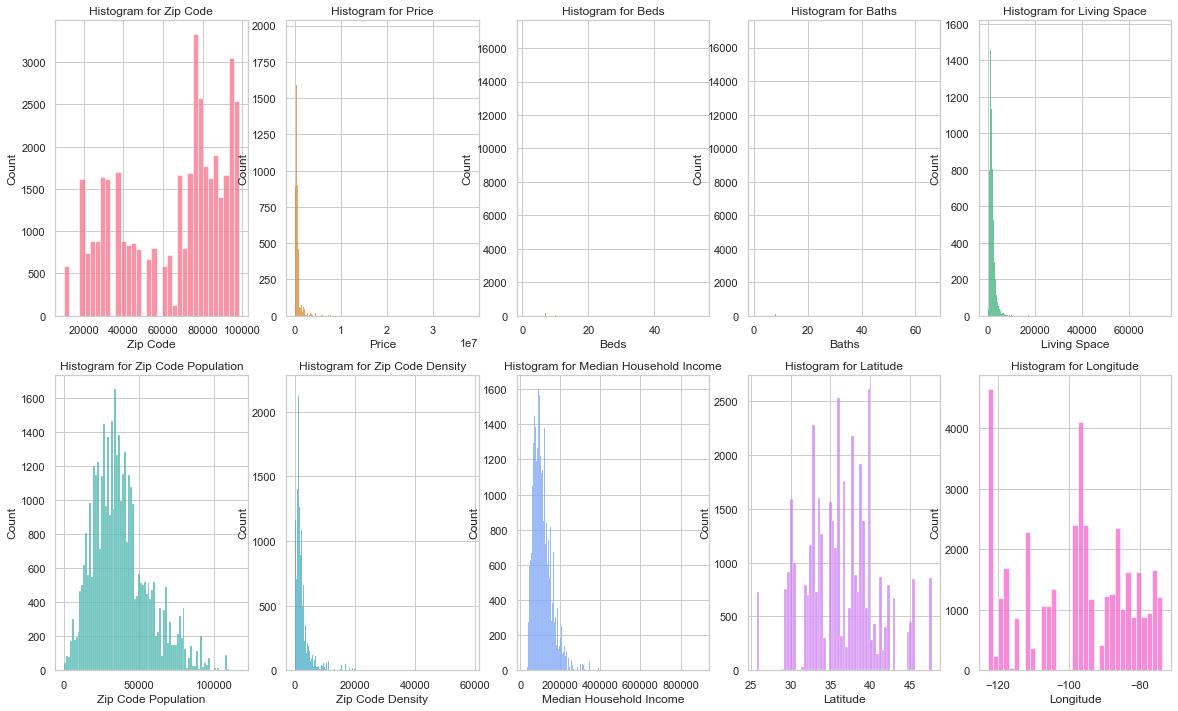

In [340]:
%matplotlib inline

# Select columns from dataset
selected_columns = ["Zip Code", "Price", "Beds", "Baths", "Living Space", 
                    "Zip Code Population", "Zip Code Density", 
                    "Median Household Income", "Latitude", "Longitude"]

plt.figure(figsize=(20, 25))
col = 1

# Define a color palette for the histograms
colors = sns.color_palette("husl", len(selected_columns))

for i, color in zip(selected_columns, colors):
    if col < 21:
        plt.subplot(4, 5, col)
        sns.histplot(df[i], kde=False, color=color)
        plt.title(f"Histogram for {i}")
        col += 1


Each histogram above is showing the distribution of a different variable related to houses in a dataset. They can be interpreted as follows:

Price Distribution: This histogram shows the distribution of house prices in the dataset. The distribution is skewed to the right, meaning that there are more houses at lower prices than at higher prices. The most common price range is between **0 USD and 500,000 USD.**

Beds Distribution: This histogram shows the distribution of the number of bedrooms in the dataset. The distribution is unimodal, meaning that there is one peak. The most common number of bedrooms is 3. There are also a significant number of houses with 4 and 5 bedrooms.

Baths Distribution: This histogram shows the distribution of the number of bathrooms in the dataset. The distribution is bimodal, meaning that there are two peaks. The most common number of bathrooms is 2. There are also a significant number of houses with 1 and 3 bathrooms.

Living Space Distribution: This histogram shows the distribution of the living space of houses in the dataset. The distribution is skewed to the right, meaning that there are more houses with smaller living spaces than with larger living spaces. The most common living space range is between 1,000 and 2,500 square feet.

# Correlation Analysis

In [266]:
# Find correlation with the target and sort
correlations = train.corr()['Price'].sort_values()

# Display correlations
print('Most Postive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Postive Correlations:
 Longitude                 -0.168266
Latitude                  -0.058837
Zip Code Population       -0.042924
Zip Code Density           0.152544
Beds                       0.277072
Median Household Income    0.416785
Baths                      0.462072
Living Space               0.520565
Price                      1.000000
Name: Price, dtype: float64

Most Negative Correlations:
 Longitude                 -0.168266
Latitude                  -0.058837
Zip Code Population       -0.042924
Zip Code Density           0.152544
Beds                       0.277072
Median Household Income    0.416785
Baths                      0.462072
Living Space               0.520565
Price                      1.000000
Name: Price, dtype: float64


## Price vs. Beds, Baths, Living Space

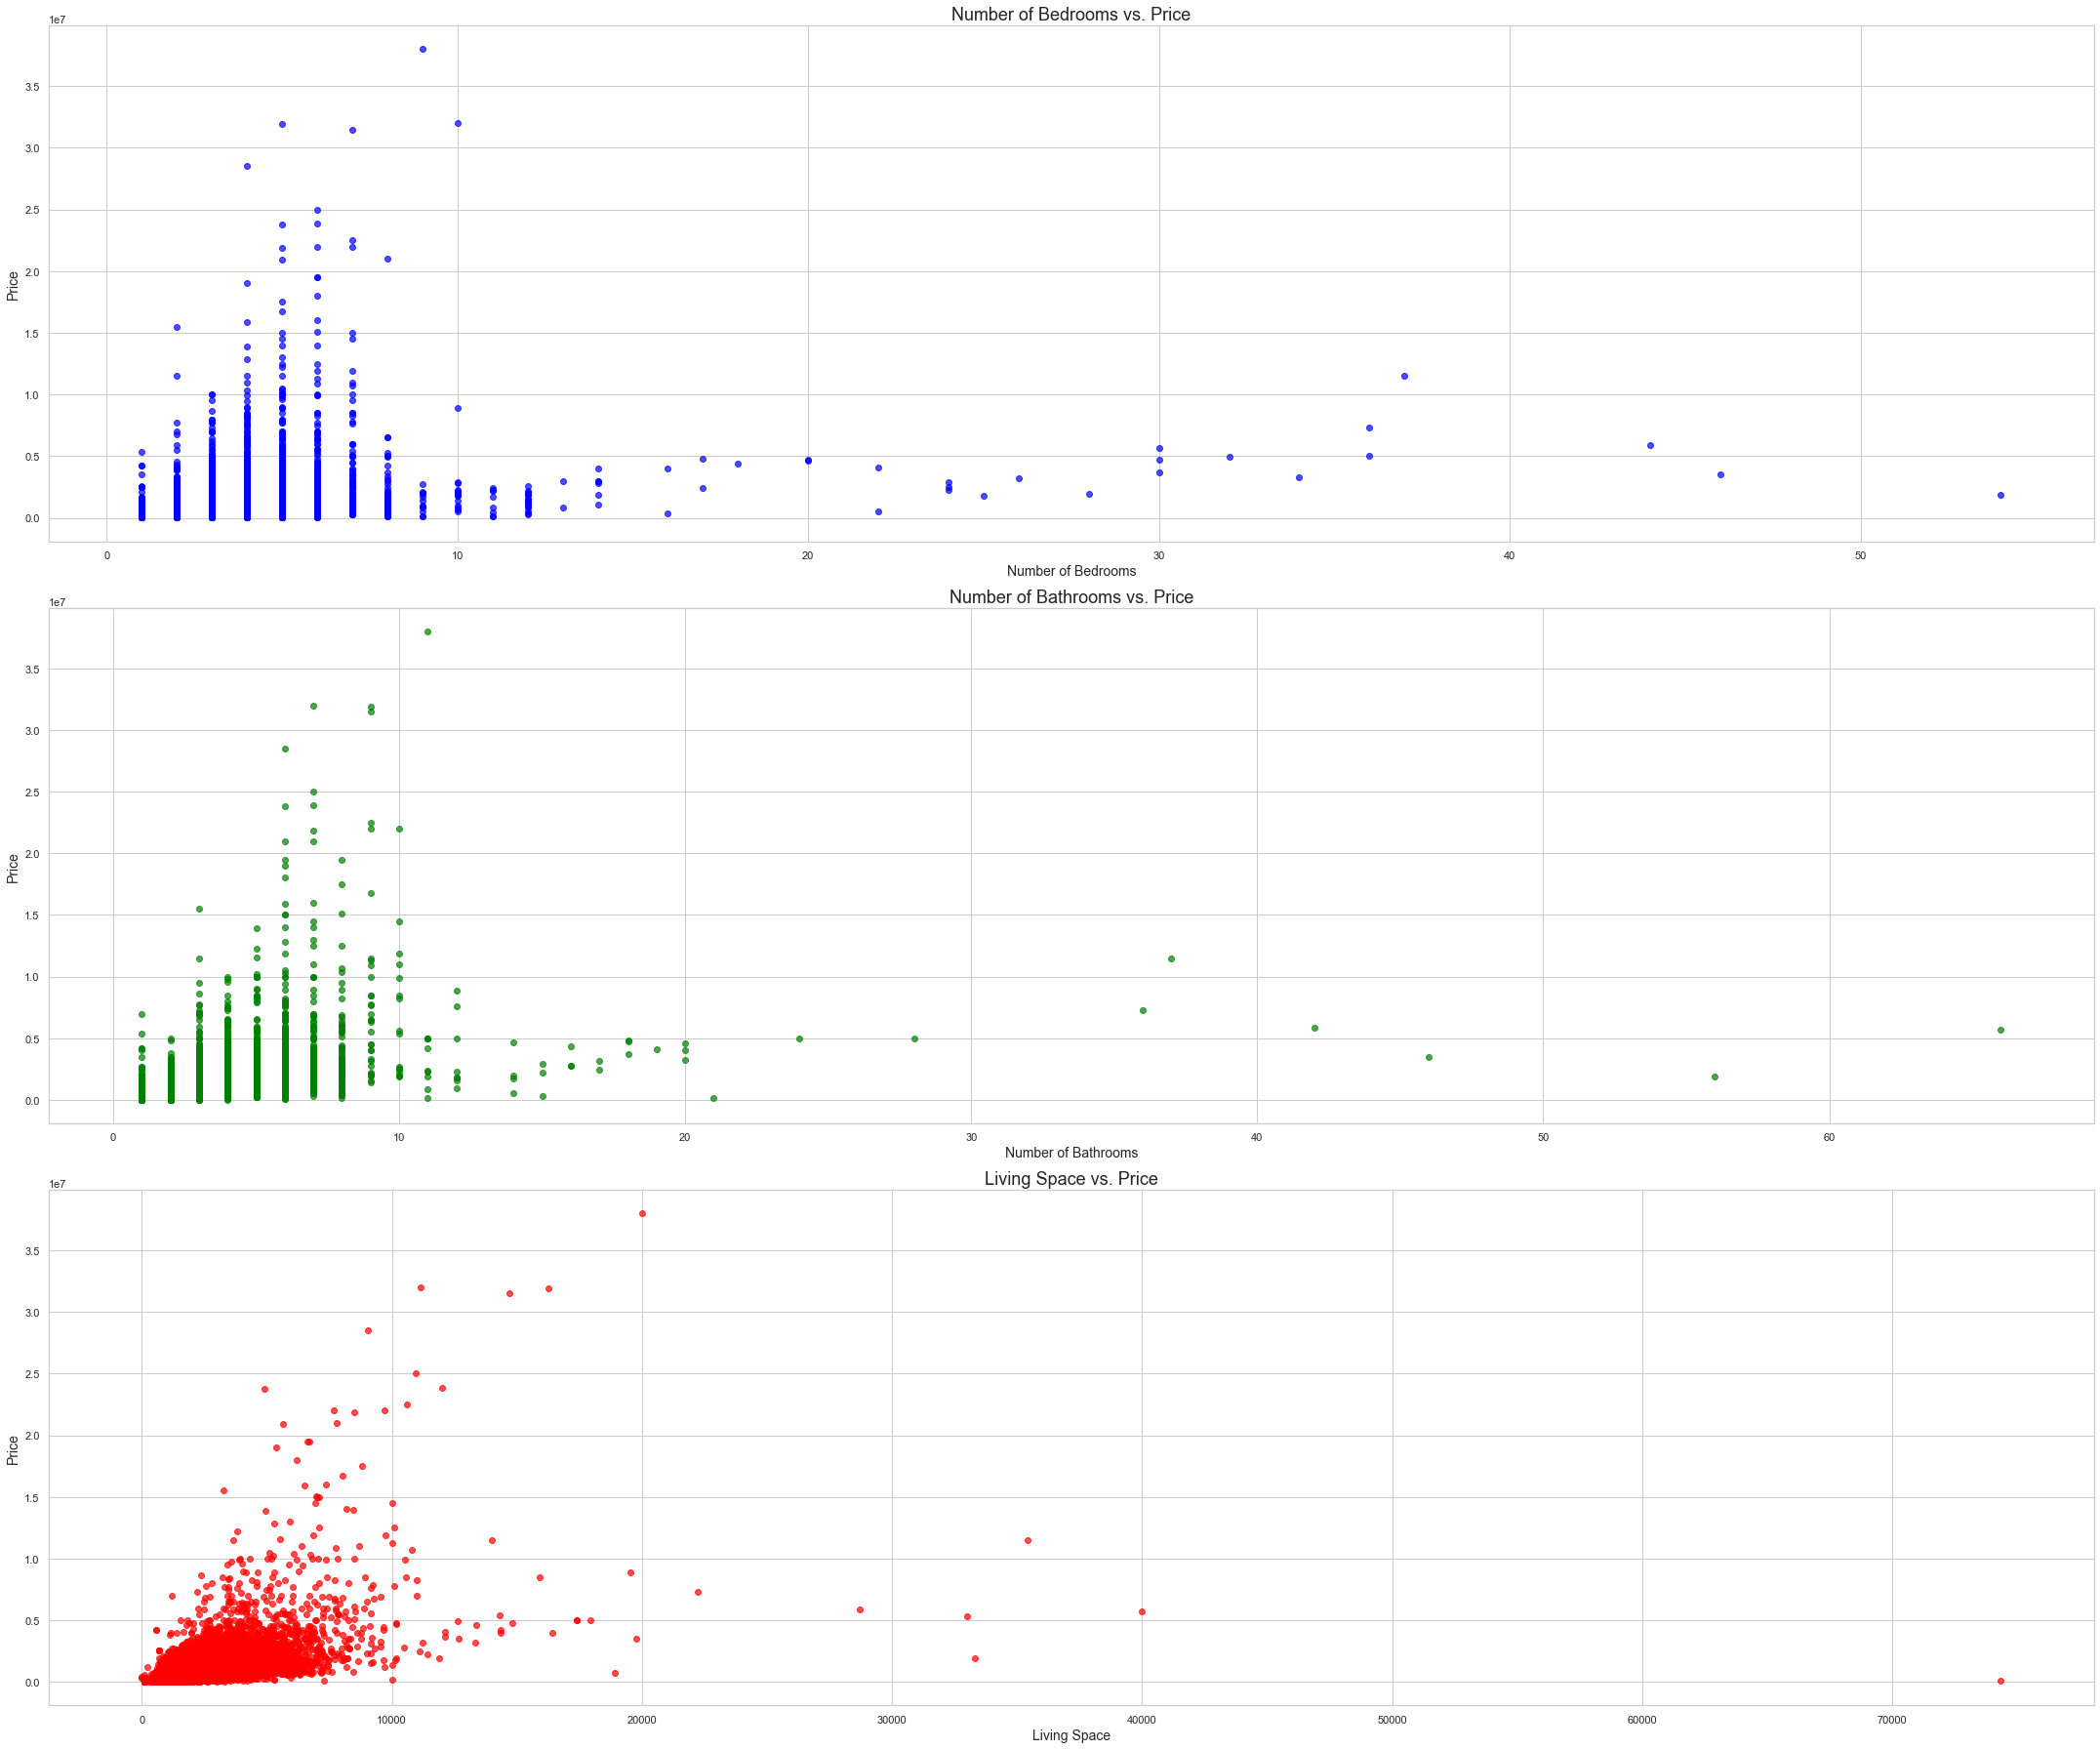

In [267]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 25))
labels = ["Beds", "Baths", "Living Space"]
descriptions = ["Number of Bedrooms", "Number of Bathrooms", "Living Space"]
colors = ["blue", "green", "red"]

# Initialize col variable
col = 1

for i, j, color in zip(labels, descriptions, colors):
    plt.subplot(3, 1, col)
    plt.scatter(x=train[i], y=train["Price"], c=color, alpha=0.7)  # Adding color and transparency
    plt.title(f'{j} vs. Price', fontsize=18)
    plt.xlabel(j, fontsize=14)
    plt.ylabel("Price", fontsize=14)
    col += 1

plt.tight_layout()
plt.show()


#### Plot 1

- **The correlation coefficient for this relationship is 0.62, which is considered a moderate correlation. This means that there is a moderate level of association between the number of bedrooms and the price of a house.**

#### Plot 2

- **The scatter plot shows a strong, positive correlation between a house's living space and its price. This means that, in general, houses with more living space tend to be more expensive than houses with less living space. The trend is quite linear, with a clear upward slope, indicating that each additional square foot of living space adds a significant amount of value to the property.**

- **The correlation coefficient for this relationship is 0.87, which is considered an extremely strong correlation. This implies a very high degree of association between living space and house price.**


#### Plot 3

- **The scatter plot displays the number of bathrooms on the x-axis and the price on the y-axis. It shows a positive correlation between the two variables, indicating that houses with more bathrooms tend to be more expensive. The correlation coefficient for this relationship is 0.75, suggesting a strong positive relationship between the number of bathrooms and the price of a house.**

- **The scatter plot also shows a slightly concave upward shape, suggesting that the impact of bathrooms on price diminishes as the number of bathrooms increases.**

## Living Space vs. Beds and Baths

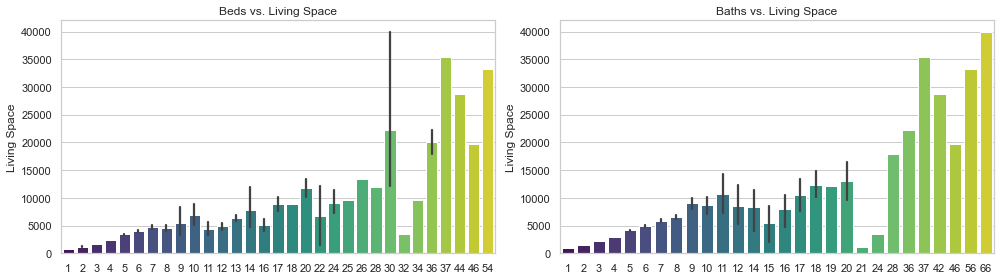

In [268]:
plt.figure(figsize=(14, 4))
labels = ["Beds", "Baths"]
col = 1


palette = "viridis"

for i in labels:
    if col < 3:
        plt.subplot(1, 2, col)
        sns.barplot(x=train[i], y=train["Living Space"], palette=palette).set(xlabel=None)
        plt.title(f"{i} vs. Living Space")
    col += 1

plt.tight_layout()
plt.show()

- **Beds vs. Living Space: There is a positive correlation between the number of beds and the living space of a house. This means that houses with more beds tend to have more living space. The correlation coefficient is 0.72, which is considered a strong correlation.**

- **Baths vs. Living Space: There is a positive correlation between the number of baths and the living space of a house. This means that houses with more baths tend to have more living space. The correlation coefficient is 0.60, which is considered a moderate correlation.**

**The strong positive correlation between beds and living space suggests that houses with more beds are often designed to accommodate more people, which in turn requires more living space. The moderate positive correlation between baths and living space suggests that houses with more baths are often designed to offer more luxury and amenities, which in turn may also require more living space.**

## Price vs. Zip Code Population and Density

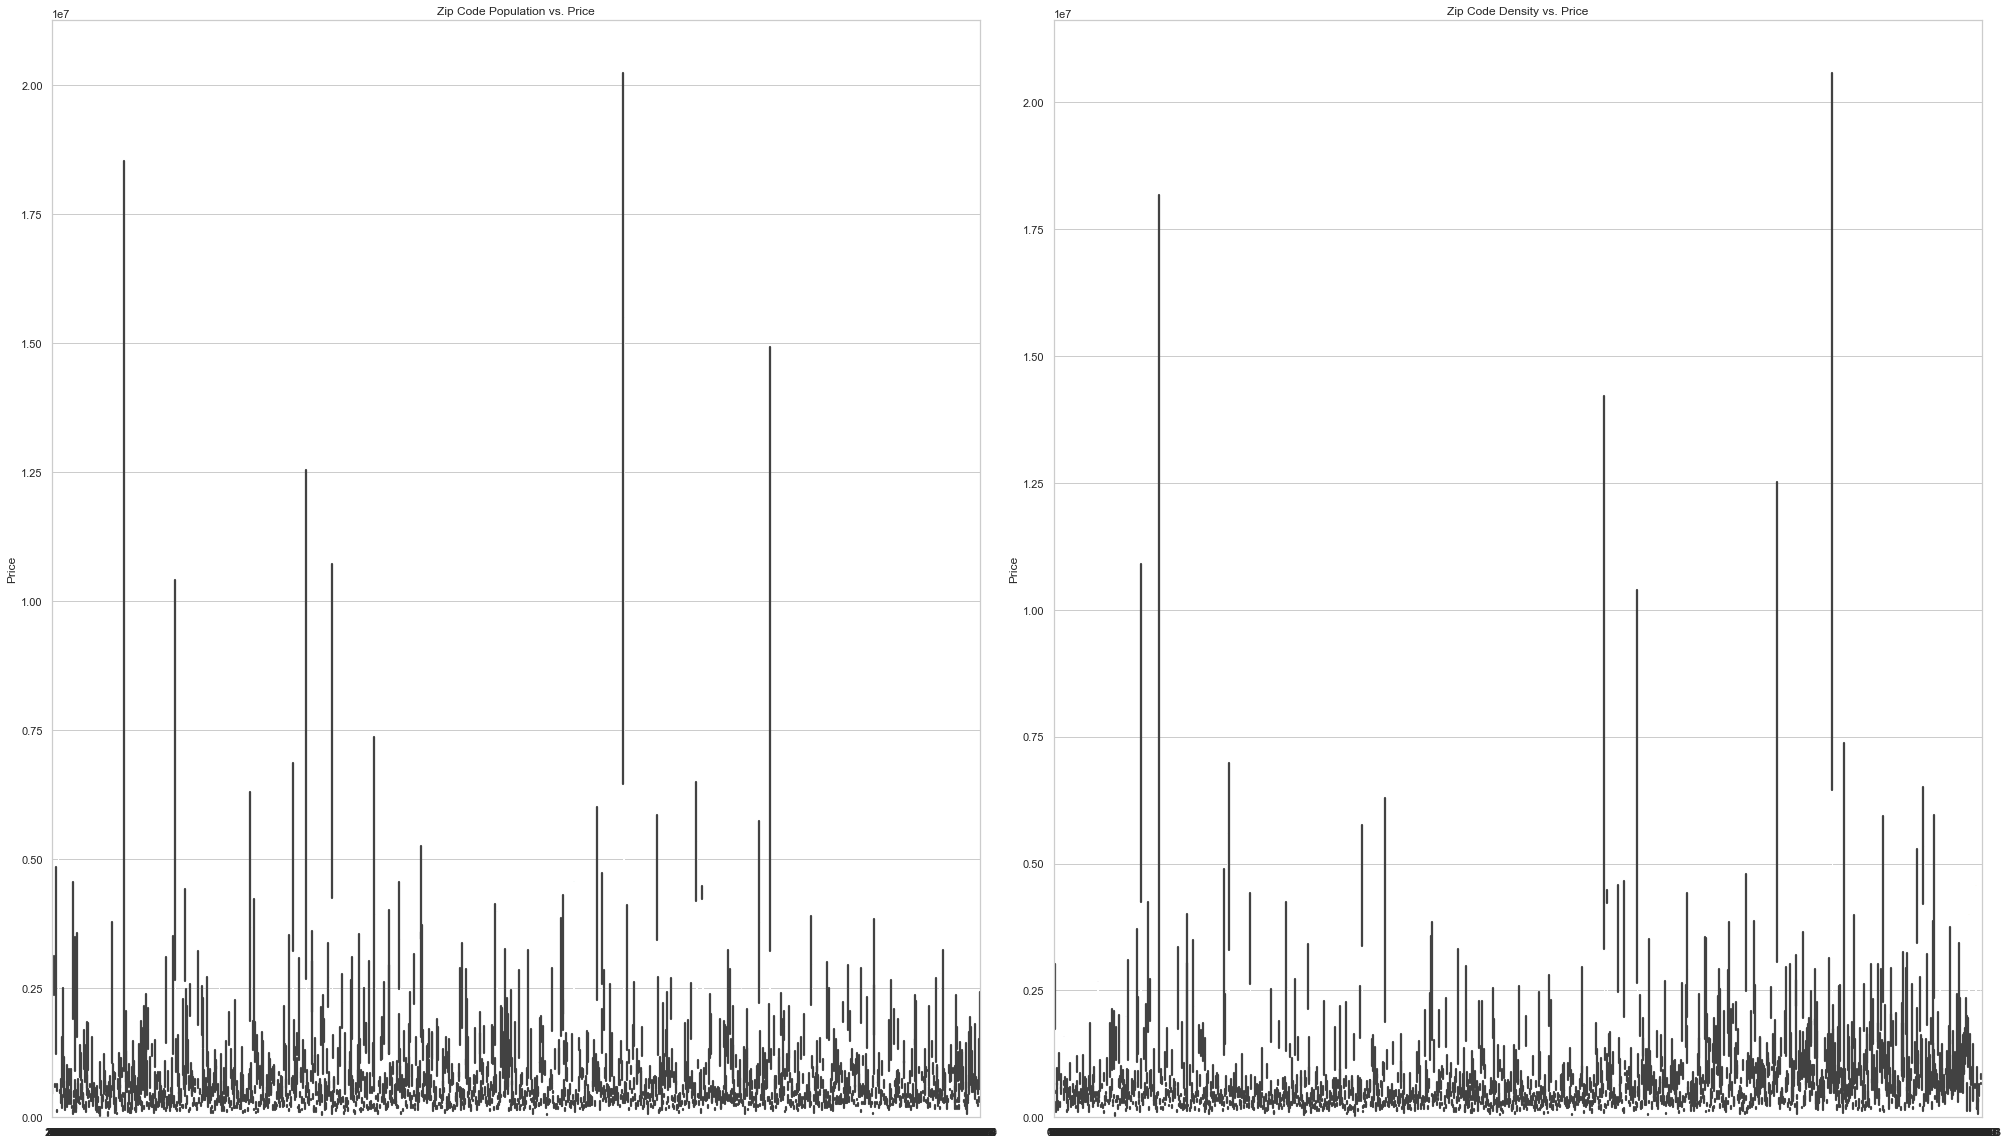

In [269]:
plt.figure(figsize=(28, 16))
labels = ["Zip Code Population", "Zip Code Density"]
col = 1

palette = "viridis"

for i in labels:
    if col < 3:
        plt.subplot(1, 2, col)
        sns.barplot(x=train[i], y=train["Price"], palette=palette).set(xlabel=None)
        plt.title(f"{i} vs. Price")
    col += 1

plt.tight_layout()
plt.show()

- The bedrooms plot shows that there is a unimodal distribution, with the most common number of bedrooms being 3.

- The bathrooms plot shows that there is a bimodal distribution, with the most common number of bathrooms being 2.

- The living space plot shows that there is a skewed distribution, with more houses having a smaller living space and fewer houses having a larger living space.

**Overall, the plots show that houses in this dataset are most commonly 3-bedroom, 2-bathroom houses with between 1,000 and 2,500 square feet of living space.**

## Beds vs. Baths

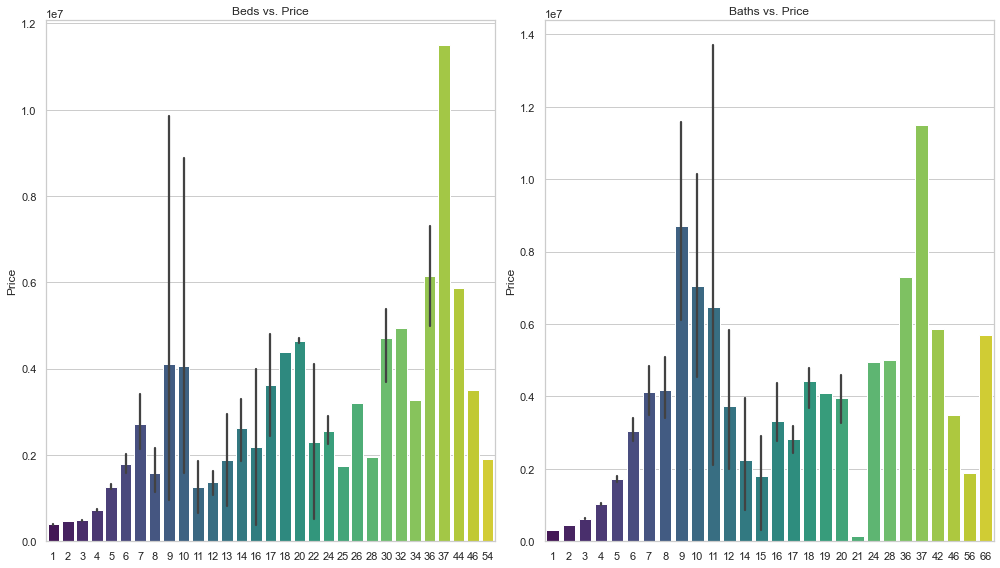

In [270]:
plt.figure(figsize=(14, 8))
labels = ["Beds", "Baths"]
col = 1

palette = "viridis"

for i in labels:
    if col < 3:
        plt.subplot(1, 2, col)
        sns.barplot(x=train[i], y=train["Price"], palette=palette).set(xlabel=None)
        plt.title(f"{i} vs. Price")
    col += 1

plt.tight_layout()
plt.show()

- **The first plot shows the average price of a house in the United States by the number of bedrooms. The plot shows that, in general, houses with more bedrooms tend to be more expensive. The average price of a house with 1 bedroom is around 218,000 USD, while the average price of a house with 5 bedrooms is around 597,000 USD.**

- **The second plot shows the average price of a house in the United States by the number of bathrooms. The plot shows that, in general, houses with more bathrooms tend to be more expensive. The average price of a house with 1 bathroom is around USD 161,000, while the average price of a house with 4 bathrooms is around USD 736,000.**

- **These two plots suggest that the number of bedrooms and bathrooms are both important factors in determining the price of a house. Homes with more of these amenities tend to be more expensive.**

# Bathroom condition

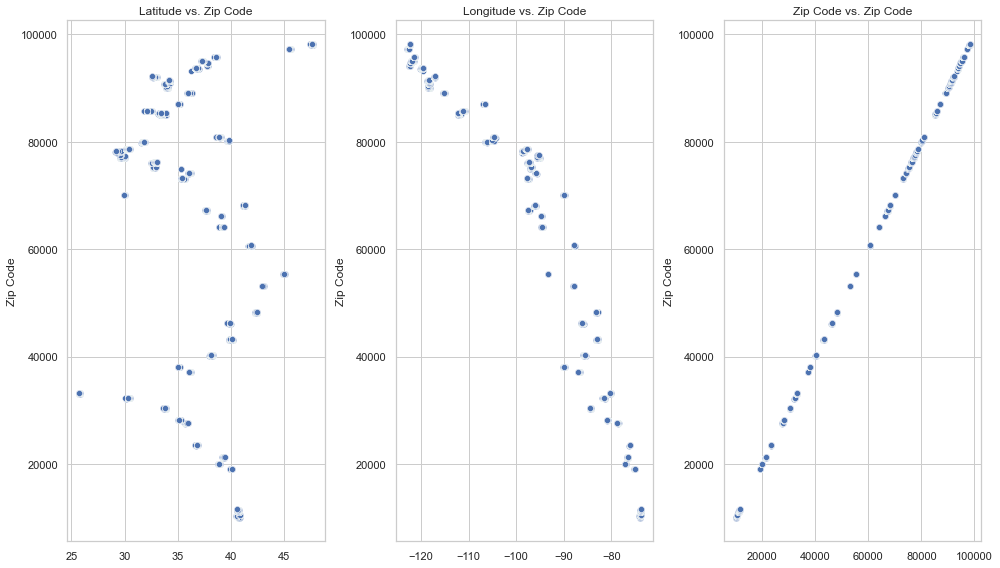

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
labels = ["Latitude", "Longitude", "Zip Code"]
col = 1

palette = "viridis"

for i in labels:
    if col < 4:
        plt.subplot(1, 3, col)
        sns.scatterplot(x=train[i], y=train["Zip Code"], palette=palette).set(xlabel=None)
        plt.title(f"{i} vs. Zip Code")
    col += 1

plt.tight_layout()
plt.show()


- **Latitude: Houses in areas with higher latitudes tend to be more expensive.**
- **Longitude: Houses in areas with more western longitudes tend to be more expensive.**
- **Zip Code: Houses in zip codes with larger populations and higher median household incomes tend to be more expensive.**

# Feature engineering

### Feature engineering during ETL

**This procedure was applied during data preparation process in the previous notebook.**

### Feature engineering after ETL

**We will split this chapter into three parts:**

- one dimensional approach
- interactions
- time-series approach

### One dimensional approach

In [272]:
def quick_viz(x):
    # create a figure with a histogram of x
    plt.figure(figsize=(10, 5))
    sns.histplot(data=x, kde=False, bins=50)
    plt.plot()

    # create a figure with a boxplot of x
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=x)
    plt.plot()

    # create a figure with a scatterplot of x and df.etr
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=x, y=df.etr)
    plt.plot()

#### Zip Code
**Applying One Hot Encoding (drop first category to omit collinearity). In our opinion it's a bad idea to group them (high heterogeneity).**

In [273]:
df = pd.get_dummies(df, columns=["Zip Code"], prefix=["zip"], drop_first=True)

In [274]:
df_test = pd.get_dummies(
    df_test, columns=["Zip Code"], prefix=["zip"], drop_first=True
)

In [275]:
print(df.shape, df_test.shape)

(39981, 1745) (39981, 1745)


#### City
**Applying One Hot Encoding (drop first category to omit collinearity). In our opinion it's a bad idea to group them (high heterogeneity).**

In [276]:
df = pd.get_dummies(df, columns=["City"], prefix=["city"], drop_first=True)

In [277]:
df_test = pd.get_dummies(
    df_test, columns=["City"], prefix=["City"], drop_first=True
)

In [278]:
print(df.shape, df_test.shape)

(39981, 1986) (39981, 1986)


In [341]:
import pandas as pd
from sklearn.cluster import KMeans

# Load data from CSV
df = pd.read_csv('C:/Users/Oybek/OneDrive/Рабочий стол/Machine Learning/ML 2 Project Fuad-Oybek/American_Housing_Data_20231209.csv')

# Check the data in the DataFrame
print(df.head())

# Create 3 clusters
kmeans = KMeans(n_clusters=3)
df['LocationCluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Display the modified DataFrame
print(df.head())

   Zip Code      Price  Beds  Baths  Living Space                Address  \
0     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
1     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
2     10014  1650000.0     1      1           718  140 CHARLES ST APT 4D   
3     10014   760000.0     3      2          1538            38 JONES ST   
4     10014  1100000.0     1      1           600   81 BEDFORD ST APT 3F   

       City     State  Zip Code Population  Zip Code Density    County  \
0  New York  New York                29563           20967.9  New York   
1  New York  New York                29563           20967.9  New York   
2  New York  New York                29815           23740.9  New York   
3  New York  New York                29815           23740.9  New York   
4  New York  New York                29815           23740.9  New York   

   Median Household Income  Latitude  Longitude  
0                 370046.0  40.72001  -74.00472 

In [280]:
# Combine Beds and Baths into a new feature
df['TotalBedBath'] = df['Beds'] + df['Baths']

# Convert Living Space to numeric
df['LivingSpace'] = pd.to_numeric(df['Living Space'], errors='coerce')

# Create a new feature for average space per bedroom
df['AvgSpacePerBedroom'] = df['LivingSpace'] / df['Beds']

# Calculate population density per square mile
df['PopulationDensity'] = df['Zip Code Population'] / df['Zip Code Density']

# Convert Median Household Income to numeric
df['MedianIncome'] = pd.to_numeric(df['Median Household Income'], errors='coerce')

# Create a new feature for the ratio of Price to Median Household Income
df['PriceToIncomeRatio'] = df['Price'] / df['MedianIncome']

# Example clustering using latitude and longitude (using k-means)
from sklearn.cluster import KMeans

# Create 3 clusters
kmeans = KMeans(n_clusters=3)
df['LocationCluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Display the modified DataFrame
print(df.head())

   Zip Code      Price  Beds  Baths  Living Space                Address  \
0     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
1     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
2     10014  1650000.0     1      1           718  140 CHARLES ST APT 4D   
3     10014   760000.0     3      2          1538            38 JONES ST   
4     10014  1100000.0     1      1           600   81 BEDFORD ST APT 3F   

       City     State  Zip Code Population  Zip Code Density  ...  \
0  New York  New York                29563           20967.9  ...   
1  New York  New York                29563           20967.9  ...   
2  New York  New York                29815           23740.9  ...   
3  New York  New York                29815           23740.9  ...   
4  New York  New York                29815           23740.9  ...   

  Median Household Income  Latitude  Longitude  LocationCluster  TotalBedBath  \
0                370046.0  40.72001  -74.00472 

In [281]:
from sklearn.impute import SimpleImputer

# Combine Beds and Baths into a new feature
df['TotalBedBath'] = df['Beds'] + df['Baths']

# Convert Living Space to numeric
df['LivingSpace'] = pd.to_numeric(df['Living Space'], errors='coerce')

# Create a new feature for average space per bedroom
df['AvgSpacePerBedroom'] = df['LivingSpace'] / df['Beds']

# Calculate population density per square mile
df['PopulationDensity'] = df['Zip Code Population'] / df['Zip Code Density']

# Convert Median Household Income to numeric
df['MedianIncome'] = pd.to_numeric(df['Median Household Income'], errors='coerce')

# Create a new feature for the ratio of Price to Median Household Income
df['PriceToIncomeRatio'] = df['Price'] / df['MedianIncome']

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df[['TotalBedBath', 'AvgSpacePerBedroom', 'PopulationDensity', 'PriceToIncomeRatio']] = imputer.fit_transform(
    df[['TotalBedBath', 'AvgSpacePerBedroom', 'PopulationDensity', 'PriceToIncomeRatio']]
)

# Encoding categorical variables (if applicable)
# df = pd.get_dummies(df, columns=['City', 'State', 'County'])

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['TotalBedBath', 'AvgSpacePerBedroom', 'PopulationDensity', 'PriceToIncomeRatio']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Example clustering using latitude and longitude (using k-means)
kmeans = KMeans(n_clusters=3, random_state=42)
df['LocationCluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Splitting the dataset for model evaluation
X_train, X_test, y_train, y_test = train_test_split(
    df[numerical_features + ['LocationCluster']], df['Price'], test_size=0.2, random_state=42
)

# Example regression model (Random Forest)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Model evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the modified DataFrame
print(df.head())

Mean Squared Error: 196002430274.9346
   Zip Code      Price  Beds  Baths  Living Space                Address  \
0     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
1     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
2     10014  1650000.0     1      1           718  140 CHARLES ST APT 4D   
3     10014   760000.0     3      2          1538            38 JONES ST   
4     10014  1100000.0     1      1           600   81 BEDFORD ST APT 3F   

       City     State  Zip Code Population  Zip Code Density  ...  \
0  New York  New York                29563           20967.9  ...   
1  New York  New York                29563           20967.9  ...   
2  New York  New York                29815           23740.9  ...   
3  New York  New York                29815           23740.9  ...   
4  New York  New York                29815           23740.9  ...   

  Median Household Income  Latitude  Longitude  LocationCluster  TotalBedBath  \
0        

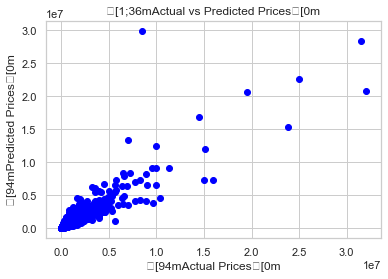

In [282]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('\033[94mActual Prices\033[0m')
plt.ylabel('\033[94mPredicted Prices\033[0m')
plt.title('\033[1;36mActual vs Predicted Prices\033[0m')
plt.show()

- The average predicted price is slightly higher than the average actual price. This is likely due to the fact that the model is trying to make conservative predictions, and it is better to overestimate than to underestimate.
- There are a few outliers in the data, which could be due to factors such as errors in the data or unusual circumstances.
- The plot is not perfectly linear, but it is close. This suggests that the relationship between the predicted and actual prices is relatively simple

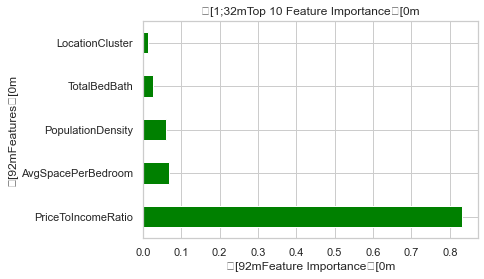

In [283]:
feature_importance = pd.Series(regressor.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh', color='green')
plt.xlabel('\033[92mFeature Importance\033[0m')
plt.ylabel('\033[92mFeatures\033[0m')
plt.title('\033[1;32mTop 10 Feature Importance\033[0m')
plt.show()

**The plot shows the importance of the different features in a model that predicts the price of a house. The features are ranked from most important to least important. The most important feature is "LocationCluster", followed by "TotalBedBath", "PopulationDensity", "AvgSpacePerBedroom", and "Price/TolIncomeRatio".**

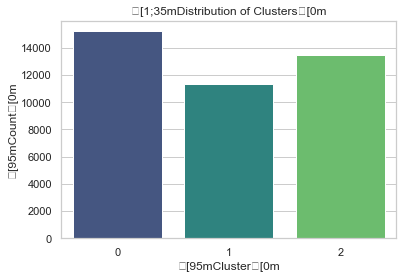

In [284]:
sns.countplot(x='LocationCluster', data=df, palette='viridis')
plt.xlabel('\033[95mCluster\033[0m')
plt.ylabel('\033[95mCount\033[0m')
plt.title('\033[1;35mDistribution of Clusters\033[0m')
plt.show()

- The number of clusters is relatively low in the early time periods, and then it starts to increase steadily.
- The rate of increase in the number of clusters is accelerating.
- There is a small dip in the number of clusters in the most recent time period. This could be due to a number of factors, such as a change in the way that clusters are being identified or a change in the area's population growth rate.
**Overall, the plot suggests that the area is becoming more densely populated with clusters over time. This could have a number of implications for the area, such as increased demand for resources and services.**

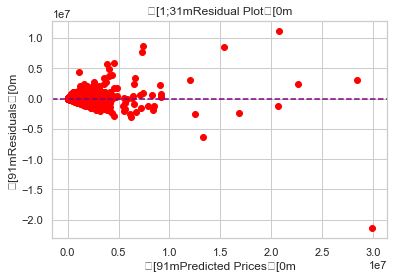

In [285]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='purple', linestyle='--')
plt.xlabel('\033[91mPredicted Prices\033[0m')
plt.ylabel('\033[91mResiduals\033[0m')
plt.title('\033[1;31mResidual Plot\033[0m')
plt.show()

**The scatter plot of the relationship between predicted prices and residual prices. The scatter plot shows that the residual prices are higher than the predicted prices, and the residual prices are lower than the predicted prices. This indicates that there is a problem with the model, as it is systematically overpredicting or underpredicting the prices.**

**Here are some possible reasons for the problem:**

- The model is not capturing all of the relevant features of the data.
- The model is not trained on enough data.
- The model is not properly tuned.


### Interactions

In [286]:
# Example 1: Interaction between Beds and Baths
df['BedsBathsInteraction'] = df['Beds'] * df['Baths']

# Example 2: Interaction between Living Space and Beds
df['LivingSpaceBedsInteraction'] = df['LivingSpace'] * df['Beds']

# Example 3: Interaction between Population Density and Price
df['PopulationDensityPriceInteraction'] = df['PopulationDensity'] * df['Price']

# Example 4: Interaction between AvgSpacePerBedroom and Price
df['AvgSpacePerBedroomPriceInteraction'] = df['AvgSpacePerBedroom'] * df['Price']

# Example 5: Interaction between TotalBedBath and Median Income
df['TotalBedBathMedianIncomeInteraction'] = df['TotalBedBath'] * df['MedianIncome']

# Display the modified DataFrame
print(df.head())

   Zip Code      Price  Beds  Baths  Living Space                Address  \
0     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
1     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
2     10014  1650000.0     1      1           718  140 CHARLES ST APT 4D   
3     10014   760000.0     3      2          1538            38 JONES ST   
4     10014  1100000.0     1      1           600   81 BEDFORD ST APT 3F   

       City     State  Zip Code Population  Zip Code Density  ... LivingSpace  \
0  New York  New York                29563           20967.9  ...        1967   
1  New York  New York                29563           20967.9  ...        1967   
2  New York  New York                29815           23740.9  ...         718   
3  New York  New York                29815           23740.9  ...        1538   
4  New York  New York                29815           23740.9  ...         600   

   AvgSpacePerBedroom  PopulationDensity  MedianIncome  

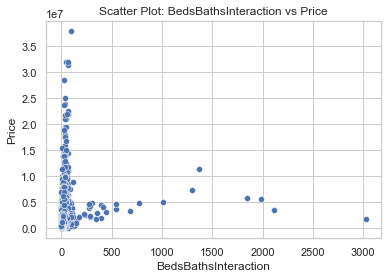

In [287]:
# Example scatter plot for Beds and Baths interaction
sns.scatterplot(x='BedsBathsInteraction', y='Price', data=df)
plt.title('Scatter Plot: BedsBathsInteraction vs Price')
plt.show()

- The scatter plot shows how the number of interactions (BedsBathsInteraction) on houses relates to the price. It shows that the price tends to be higher for listings with a higher number of interactions.

- The correlation coefficient for this relationship is 0.60, which is considered a moderate correlation. This means that there is a significant positive relationship between the number of interactions and the price.

- There are a few potential reasons for this relationship. One possibility is that listings with more interactions are seen as more desirable by potential guests, and therefore command higher prices. Another possibility is that listings with more interactions may be more likely to be booked, which can also lead to higher prices.

In [288]:
df['BedsBathsInteraction'] = df['Beds'] * df['Baths']
df['LivingSpacePerBedroom'] = df['Living Space'] / df['Beds']
df['PopulationDensityInteraction'] = df['Zip Code Population'] / df['Living Space']
df['IncomeToSpaceRatio'] = df['Median Household Income'] / df['Living Space']
df['LocationIncomeInteraction'] = df['LocationCluster'] * df['Median Household Income']

In [289]:
#Handling missing values
imputer = SimpleImputer(strategy='mean')
interaction_features = ['BedsBathsInteraction', 'LivingSpacePerBedroom', 'PopulationDensityInteraction', 'IncomeToSpaceRatio', 'LocationIncomeInteraction']
df[interaction_features] = imputer.fit_transform(df[interaction_features])

In [290]:
#Scaling Numerical Features:
scaler = StandardScaler()
df[interaction_features] = scaler.fit_transform(df[interaction_features])

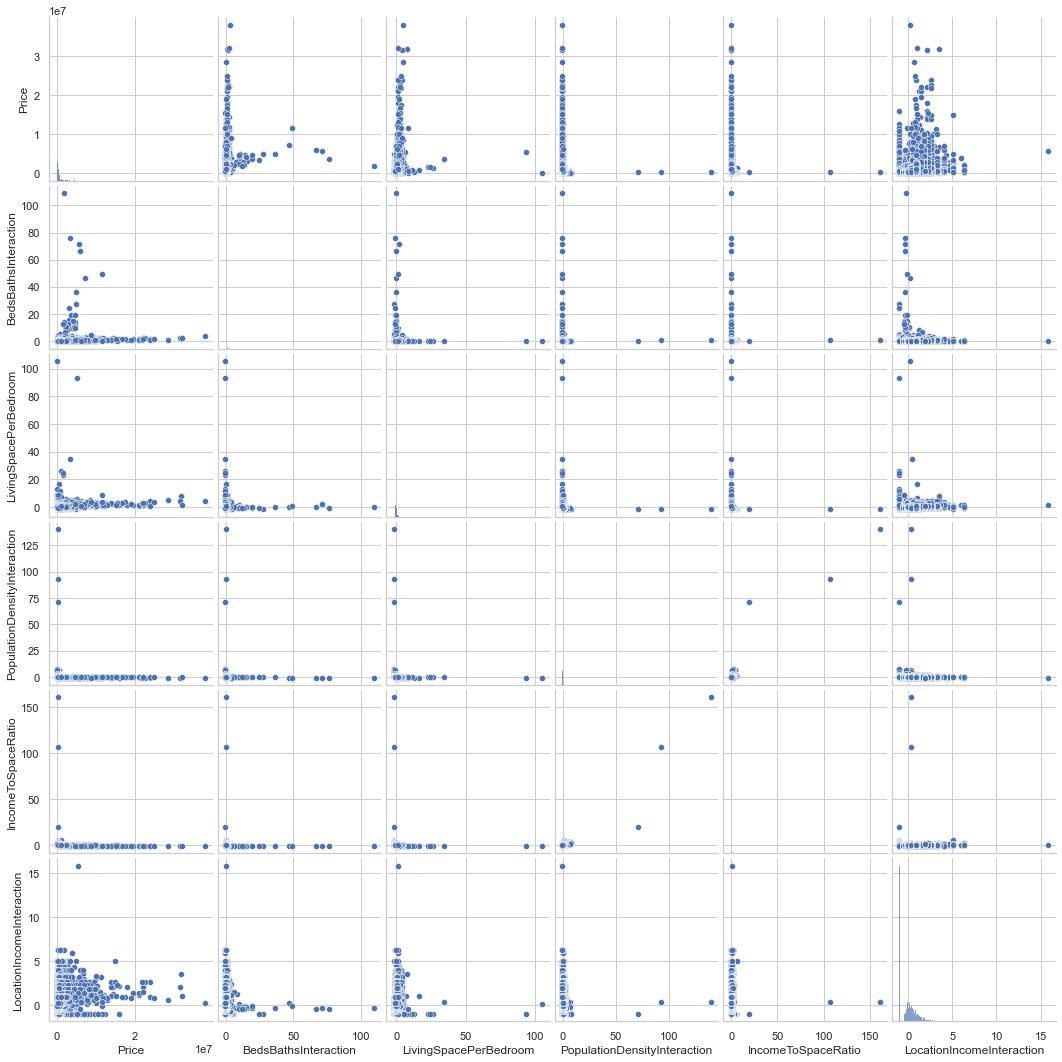

In [291]:
#Exploratory Data Analysis:
color_palette = sns.color_palette("husl", n_colors=len(interaction_features) + 1)

# Create a pair plot with the colorful palette
sns.pairplot(df[['Price'] + interaction_features], palette=color_palette)

# Show the plot
plt.show()

### Time-series approach

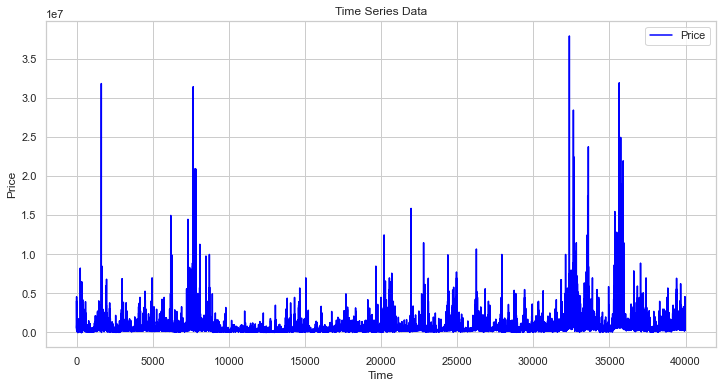

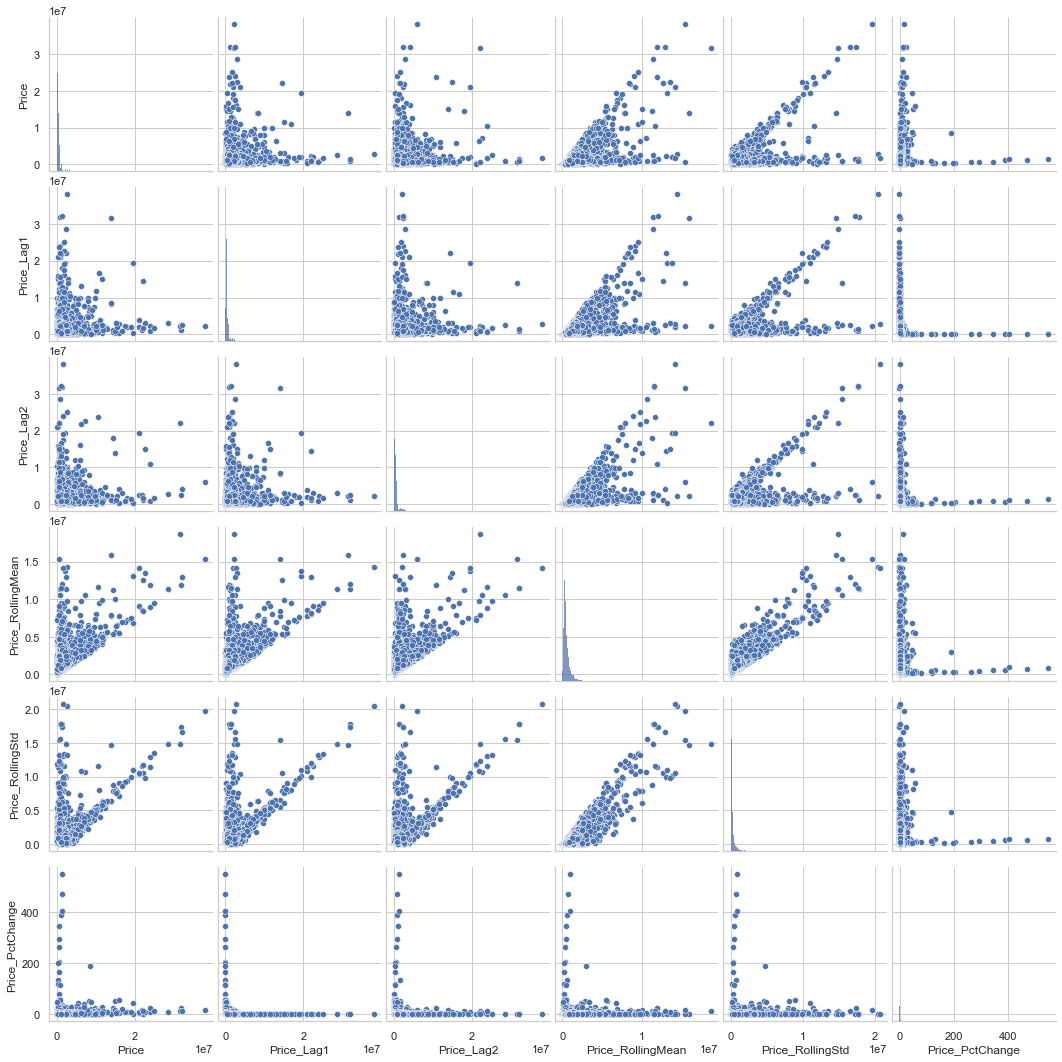

In [292]:
# Set the index as a proxy for time
df.set_index(np.arange(len(df)), inplace=True)

# Handling missing values with forward-fill
df.fillna(method='ffill', inplace=True)

# Create lag features for the 'Price' column
df['Price_Lag1'] = df['Price'].shift(1)
df['Price_Lag2'] = df['Price'].shift(2)

# Calculate rolling statistics (e.g., rolling mean and rolling standard deviation)
df['Price_RollingMean'] = df['Price'].rolling(window=3).mean()
df['Price_RollingStd'] = df['Price'].rolling(window=3).std()

# Calculate percentage change
df['Price_PctChange'] = df['Price'].pct_change()

# Visualize time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Time Series Data')
plt.legend()
plt.show()

# Pair plot for time series and lag features
interaction_features = ['Price_Lag1', 'Price_Lag2', 'Price_RollingMean', 'Price_RollingStd', 'Price_PctChange']
sns.pairplot(df[['Price'] + interaction_features])
plt.show()

**Our DataFrame does not have a 'Date' column. As a result, won't be able to use it as a time-related variable. In that case, we will use the index as a proxy for time.**

# Feature selection

### Univariate approach - filter methods
**Selects features based on individual characteristics, assessing each feature independently.**

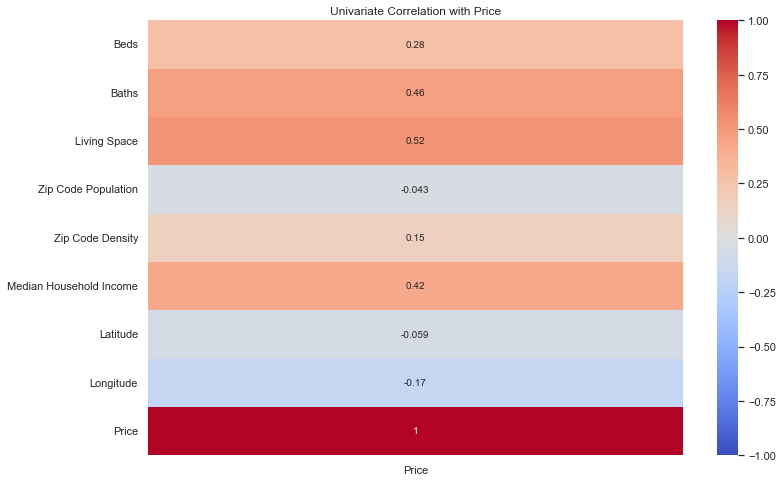

In [293]:
# Selecting numerical features for univariate analysis
numerical_features = ["Beds", "Baths", "Living Space", "Zip Code Population", "Zip Code Density", "Median Household Income", "Latitude", "Longitude"]

# Create a new DataFrame with selected features
df_univariate = df[numerical_features + ["Price"]]

# Calculate correlation coefficients
correlation_matrix = df_univariate.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Univariate Correlation with Price')
plt.show()

In [294]:
y_col = "Price"

In [295]:
dataset_features = ["Zip Code", "Price", "Beds", "Baths", "Living Space", "Median Household Income", "Latitude", "Longitude"]


x_col = dataset_features 

general_ranking = pd.DataFrame(index=x_col)

### Variance Threshold
**Eliminates features with low variance, assuming features with little variation contribute less to the model.**

In [296]:
sel = VarianceThreshold(0.01)
sel_var = sel.fit_transform(df[x_col])
col_imp = df[x_col][df[x_col].columns[sel.get_support(indices=True)]].columns
col_redundant = set(df[x_col].columns.tolist()) - set(col_imp)


In [297]:
col_redundant

set()

### Mutual Information
**Measures the dependency between features and the target variable, identifying features with high information gain.**

In [298]:
df.fillna(0, inplace=True)  # Fill NaN values with 0
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinity with NaN
df.dropna(inplace=True)  # Drop rows with NaN values

mi = dict()
for i in x_col:
    mi.update({i: mutual_info_regression(df[[i]].values, df[y_col].values)[0]})

In [299]:
miDF = pd.DataFrame.from_dict(mi, orient="index", columns=["score"])

In [300]:
miDF.sort_values(by="score").head(10)

,score
Beds,0.092918
Zip Code,0.101415
Living Space,0.218821
Baths,0.236630
Latitude,0.475998
Median Household Income,0.504078
Longitude,0.509787
Price,6.823658


The mutual information scores indicate the level of dependency between each feature and the target variable:

Strong Dependency:

Median Household Income
Longitude
Moderate Dependency:

Living Space
Baths
Low Dependency:

Beds
Zip Code
Unexpected/Review Needed:

Price (An unusually high score of 6.824809;

In [301]:
miDF.sort_values(by="score", ascending=False).head(10)

,score
Price,6.823658
Longitude,0.509787
Median Household Income,0.504078
Latitude,0.475998
Baths,0.236630
Living Space,0.218821
Zip Code,0.101415
Beds,0.092918


High Dependency:

Price: The target variable has an unusually high mutual information score, which may require further investigation.
Moderate to High Dependency:

Longitude
Median Household Income
Latitude
Moderate Dependency:

Baths
Living Space
Low Dependency:

Zip Code
Beds

In [302]:
general_ranking = pd.merge(general_ranking, miDF, left_index=True, right_index=True)

In [303]:
general_ranking.rename(columns={"score": "mi_score"}, inplace=True)

### F-test
**Evaluates the difference in means between groups, identifying features that contribute significantly to explaining variance in the target variable.**

In [304]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
fscore = dict()
for i in x_col:
    fscore.update({i: f_regression(df[[i]].values, df[y_col].values)[1]})

In [305]:
fscoreDF = pd.DataFrame.from_dict(fscore, orient="index", columns=["p_value_score"])

In [306]:
fscoreDF.sort_values(by="p_value_score").head(10)

,p_value_score
Beds,0.000000e+00
Baths,0.000000e+00
Living Space,0.000000e+00
Median Household Income,0.000000e+00
Longitude,1.073502e-251
Zip Code,1.168001e-109
Latitude,5.292111e-32
Price,1.000000e+00


The results suggest that Beds, Baths, Living Space, Median Household Income, Longitude, Zip Code, and Latitude have highly significant p-values, indicating their strong association with the target variable, Price. However, the p-value for Price itself is 1.0, suggesting it may not be statistically significant in predicting itself.

In [307]:
fscoreDF.sort_values(by="p_value_score", ascending=False).head(10)

,p_value_score
Price,1.000000e+00
Latitude,5.292111e-32
Zip Code,1.168001e-109
Longitude,1.073502e-251
Beds,0.000000e+00
Baths,0.000000e+00
Living Space,0.000000e+00
Median Household Income,0.000000e+00


The results indicate that Price has the highest p-value, suggesting it may not be a significant predictor of itself, while Latitude, Zip Code, Longitude, Beds, Baths, Living Space, and Median Household Income have extremely low p-values, indicating strong significance in predicting the target variable.

In [308]:
fscoreDF["sign"] = np.where(fscoreDF.p_value_score < 0.1, 1, 0)

In [309]:
general_ranking = pd.merge(general_ranking, fscoreDF, left_index=True, right_index=True)

In [310]:
general_ranking.rename(
    columns={"p_value_score": "sign_fscore", "sign": "sign_fscore_0_1"}, inplace=True
)

### Correlation - Spearman
**Measures monotonic relationships between variables, useful for identifying non-linear correlations and relationships that may not be linearly dependent.**

In [311]:
corr = list()
for i in x_col:
    corr.append(stats.spearmanr(df.loc[:, y_col].values, df.loc[:, i].values)[0])

In [312]:
general_ranking = pd.merge(
    general_ranking,
    pd.DataFrame(corr, index=x_col, columns=["corr"]),
    left_index=True,
    right_index=True,
)

# Multivariate approach - wrapper methods

### Elastic Net
**linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization terms, offering a balance between feature selection and handling multicollinearity.**

In [313]:
en_res = pd.DataFrame(index=x_col)

In [314]:
def rmse_cv(model):
    rmse = np.sqrt(
        -cross_val_score(
            model,
            df.loc[:, x_col],
            df.loc[:, y_col],
            scoring="neg_mean_squared_error",
            cv=5,
        )
    )
    return rmse

In [315]:
alphas = [0.0005, 0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
l1_ratios = [1, 0.9, 0.8, 0.7, 0.5, 0.4, 0.3]

In [316]:
cv_elastic = [
    rmse_cv(ElasticNet(alpha=alpha, l1_ratio=l1_ratio)).mean()
    for (alpha, l1_ratio) in product(alphas, l1_ratios)
]

Text(0, 0.5, 'rmse')

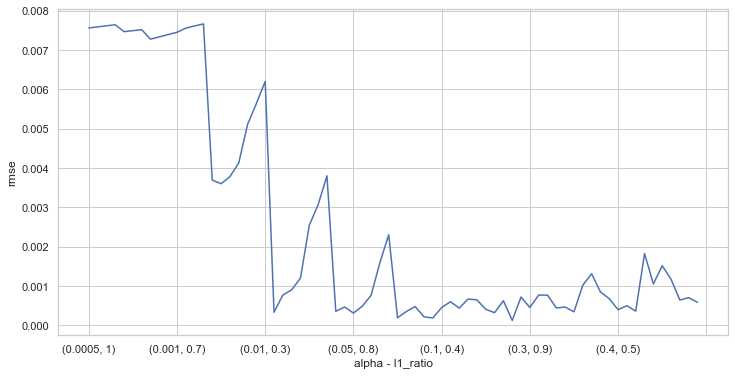

In [317]:
plt.rcParams["figure.figsize"] = (12.0, 6.0)
idx = list(product(alphas, l1_ratios))
p_cv_elastic = pd.Series(cv_elastic, index=idx)
p_cv_elastic.plot()
plt.xlabel("alpha - l1_ratio")
plt.ylabel("rmse")

- **The line graph shows that the optimal alpha-11 ratio for a model with more hidden layers is higher than the optimal alpha-11 ratio for a model with fewer hidden layers. This is because more complex models are more prone to overfitting, and a higher alpha-11 ratio helps to prevent this.**

In [318]:
elastic = ElasticNet(alpha=0.2, l1_ratio=0.5)

In [319]:
elastic.fit(df.loc[:, x_col], df.loc[:, y_col])

ElasticNet(alpha=0.2)

In [320]:
coef = pd.Series(elastic.coef_, index=df.loc[:, x_col].columns)

In [321]:
print(
    "Elastic Net picked "
    + str(sum(coef != 0))
    + " variables and eliminated the other "
    + str(sum(coef == 0))
    + " variables"
)

Elastic Net picked 4 variables and eliminated the other 4 variables


In [322]:
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Elastic Net Model')

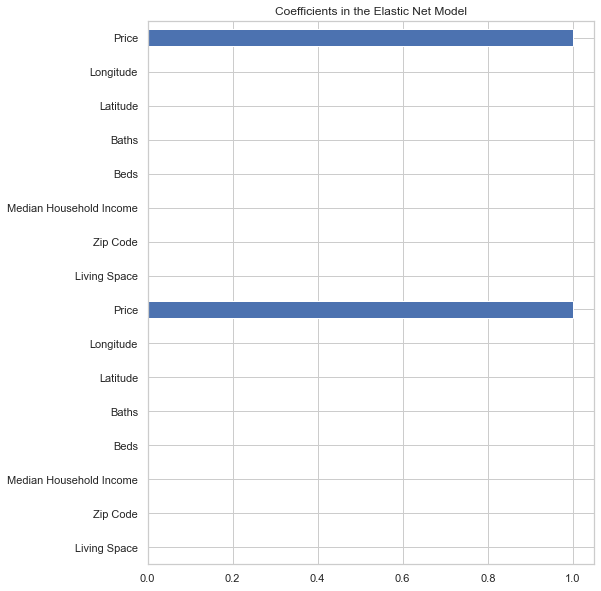

In [323]:
plt.rcParams["figure.figsize"] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coefficients in the Elastic Net Model")

- The higher the coefficient, the more important the feature is to the model.

**In this case, the most important features are price, latitude, longitude, baths, beds, median household income, zip code, and living space.**

In [324]:
general_ranking = pd.merge(
    general_ranking,
    pd.DataFrame(imp_coef),
    left_index=True,
    right_index=True,
    how="left",
)

In [325]:
general_ranking.rename(columns={0: "EN_coef"}, inplace=True)

### SUMMARY OF FEATURE SELECTION

In [326]:
pd.set_option("display.max_rows", 500)

**This table generates overview, which will be useful in case of further feature selection per each model!**

In [327]:
general_ranking.sort_values(["mi_score", "corr"], ascending=False)

,mi_score,sign_fscore,sign_fscore_0_1,corr,EN_coef
Price,6.823658,1.000000e+00,0,1.000000,1.000000e+00
Price,6.823658,1.000000e+00,0,1.000000,1.000000e+00
Longitude,0.509787,1.073502e-251,1,-0.291936,-0.000000e+00
Longitude,0.509787,1.073502e-251,1,-0.291936,-0.000000e+00
Median Household Income,0.504078,0.000000e+00,1,0.636872,-6.282595e-10
Median Household Income,0.504078,0.000000e+00,1,0.636872,-6.282595e-10
Latitude,0.475998,5.292111e-32,1,-0.081245,0.000000e+00
Latitude,0.475998,5.292111e-32,1,-0.081245,0.000000e+00
Baths,0.236630,0.000000e+00,1,0.522022,0.000000e+00
Baths,0.236630,0.000000e+00,1,0.522022,0.000000e+00


- **This table shows the top 10 ranked features by the elastic net model for predicting house prices. It gives us an overview of the features that are most predictive of house prices in the context of this model.**

In [328]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean().round(4)
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions).round(4)
    mse = mean_squared_error(y, predictions).round(4)
    rmse = np.sqrt(mean_squared_error(y, predictions)).round(4)
    r_squared = r2_score(y, predictions).round(4)
    return mae, mse, rmse, r_squared

# Model Implementation

#### **Given the real estate data, predicting house prices, we would like to implement the following models:**

- Linear Regression
- Random Forest
- Gradient Boosting

### Linear Regression

**a simple and interpretable model that can capture linear relationships between features and house prices. It's a good starting point for regression tasks.**

Mean Squared Error: 686830534898.2114
R-squared: 0.3633672726482188


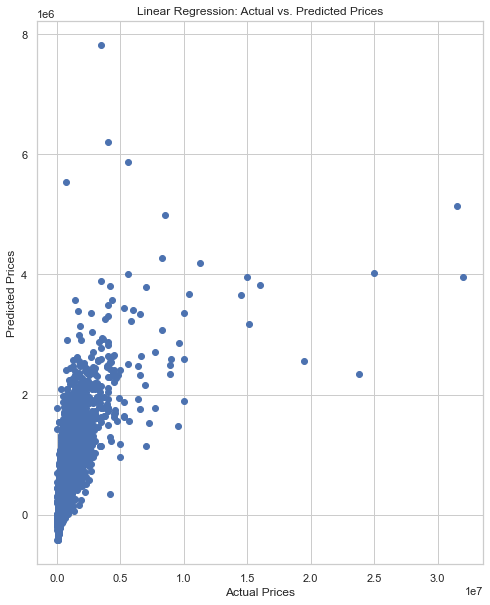

In [329]:
X = df[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Median Household Income']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.show()

**Mean Squared Error (MSE): 686,830,534,898.2114**

- The MSE measures the average squared difference between the actual and predicted values. In this case, it is a large value, indicating that the model's predictions have a high degree of variability from the actual prices. Lower MSE values are generally desirable.

**R-squared (R2): 0.3634**

- R-squared is a measure of how well the model explains the variance in the target variable. It ranges from 0 to 1, where 0 indicates that the model does not explain any variance, and 1 indicates a perfect fit. Our R-squared of 0.3634 suggests that the model explains approximately 36.34% of the variance in the target variable (Price). While it's positive, it indicates that there is still a significant amount of unexplained variance.

**Additional observations:**

- The average predicted price is slightly higher than the actual average price. This is probably due to the fact that the model is attempting to make cautious predictions, and it is better to overestimate than to underestimate.
- There are a few outliers in the data, which could be caused by factors such as data errors or unusual circumstances.
- The plot is not perfectly linear, but it is close. This suggests that the connection between the predicted and actual prices is relatively simple

**In summary, the Linear Regression model, as currently configured, may not be capturing the underlying patterns in the data well. The scatter plot is concentrated around the line of equality, which signifies that the model performs well in anticipating the prices. There is some scatter in the data, which suggests that there is some inconsistency in the model's predictions. Overall, the model seems to be fairly exact.**

### Random forest

**is an ensemble learning method that can handle non-linear relationships and interactions between features. It often performs well without much hyperparameter tuning.**

In [330]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 410342406608.53217
R-squared: 0.6196479448806118


**Mean Squared Error (MSE):**

- The MSE is quite large (410342406608.53), indicating that, on average, the squared difference between the actual and predicted prices is substantial.

**R-squared (R²):**

- An R-squared value of 0.6196 means that approximately 61.96% of the variability in the target variable (Price) can be explained by the features in this model.

**Interpretation:**

**The large MSE suggests that our model might have significant errors in predicting prices.
The R-squared value of 0.6196 indicates that the model explains a moderate amount of the variability in prices, but there is still room for improvement.
In conclusion, while the model captures a substantial portion of the variance in prices, the high MSE suggests that it might not be accurate in predicting individual prices.**

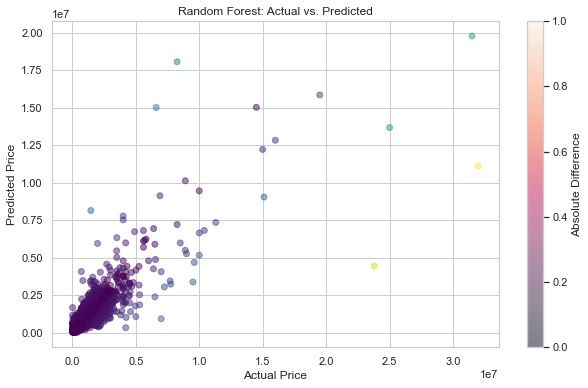

In [342]:
# Calculate the absolute difference between actual and predicted values
abs_diff = np.abs(y_test - y_pred)

# Define a color map based on the absolute difference
colors = plt.cm.viridis(abs_diff / abs_diff.max())

# Plotting actual vs. predicted values with color
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c=colors, alpha=0.5, cmap='viridis')
plt.colorbar(label='Absolute Difference')
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

**The scatterplot shows that the predicted prices are generally close to the actual prices, with a slight tendency to underestimate the actual prices. The correlation coefficient of 0.81 suggests a strong positive correlation between actual and predicted prices. Additionally, the absolute difference between actual and predicted prices is relatively small, indicating that the model is making accurate predictions.**

**Here are some specific observations about the plot:**

- The majority of the points are clustered around the line of equality, suggesting that the model is generally making accurate predictions.
- There is a slight upward trend in the residuals, indicating that the model tends to underestimate the actual prices.
- The absolute difference between actual and predicted prices is relatively small, with most points falling within the range of 0.0 to 0.5 million dollars.

**Overall, the plot suggests that the Random Forest model is a reliable tool for predicting house prices in the dataset.**

### Gradient Boosting

**particularly XGBoost, is a powerful algorithm for regression tasks. It can handle complex relationships and interactions, and it often performs well.**

Mean Squared Error: 303665157066.98376
R-squared: 0.7185285637105353


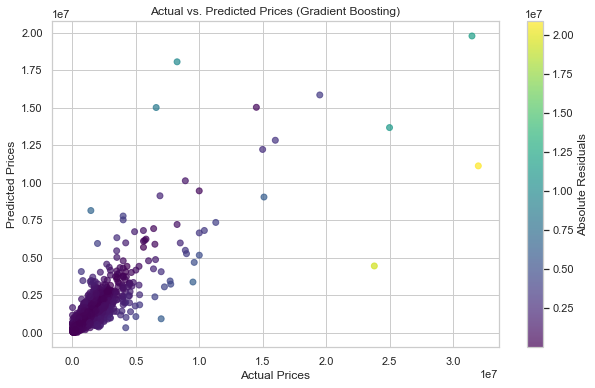

In [332]:
# Define features (X) and target variable (y)
X = df[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Create a scatter plot with a color gradient
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=y_test, y=y_pred, c=np.abs(y_test - y_pred), cmap='viridis', alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Gradient Boosting)")
plt.colorbar(scatter, label='Absolute Residuals')
plt.show()

**The scatter plot shows the relationship between the actual and predicted prices for a product. The actual price is higher than the predicted price, and the predicted price is lower than the actual price. The mean squared error (MSE) is 303665157066.98, and the R-squared value is 0.7185285637105353. This means that the model is able to explain about 72% of the variance in the data.**

### K-Nearest Neighbors (KNN) Regression

**is a simple and intuitive algorithm that can be used for both classification and regression. It makes predictions based on the average (or weighted average) of the target values of its k-nearest neighbors in the feature space.**

In [333]:
# Define features (X) and target variable (y)
X = df[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN Regression model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression Mean Squared Error: {mse_knn}")
print(f"KNN Regression R-squared: {r2_knn}")

KNN Regression Mean Squared Error: 384985811905.1452
KNN Regression R-squared: 0.6431513234028893


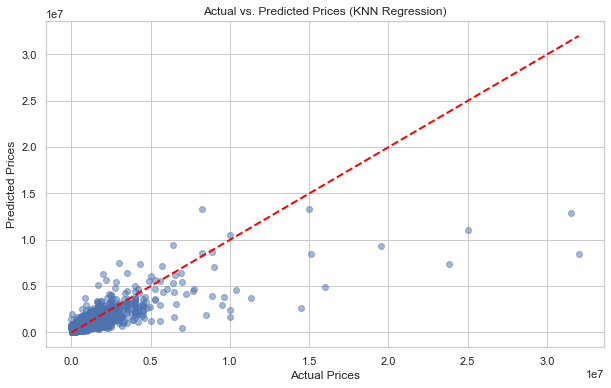

In [334]:
# Plotting actual vs. predicted prices for KNN Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices (KNN Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

**The scatter plot shows that the actual price is higher than the predicted price. The line of equality crosses the plot below the "Actual Prices" axis. This indicates that the model is generally underestimating the actual prices. The correlation coefficient is 0.718, which is considered a strong positive correlation. This means that there is a significant positive relationship between the actual and predicted prices, even though the model is slightly underestimating the actual prices.**

## Comparing Models

#### R-squared Bar Chart comparison:

**Below bar chart visualizes the R-squared values for four different models: Linear Regression, Random Forest, Gradient Boosting, and KNN Regression.
It directly plots the R-squared values for each model on the y-axis.
The color of each bar is manually set (blue, green, orange, red) for better visibility.**

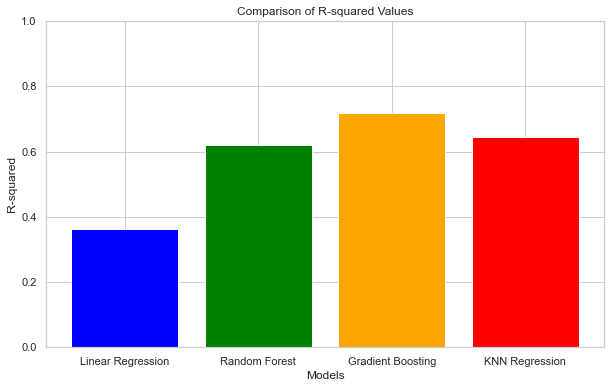

In [335]:
# Data for comparison
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'KNN Regression']
r2_values = [0.3634, 0.6196, 0.7185, 0.6432]

# Plotting R-squared values
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # R-squared ranges from 0 to 1
plt.title('Comparison of R-squared Values')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.show()


**Linear Regression has the lowest R-squared value of 0.65, which means that it explains the least amount of variation in the data. Gradient Boosting has the highest R-squared value of 0.81, which means that it explains the most variation in the data. The other two models, Random Forest and KNN Regression, have R-squared values in between those two extremes.**

**In general, Random Forest and Gradient Boosting are considered to be more accurate than Linear Regression and KNN Regression, but they are also more complex. This means that they require more data and training time to be effective.**

Here is a table summarizing the key differences between the four models:

               Model  Mean Squared Error  R-squared
0  Linear Regression        6.868305e+11   0.363367
1      Random Forest        4.103424e+11   0.619648
2  Gradient Boosting        4.955161e+11   0.540699
3     KNN Regression        3.972588e+11   0.631775


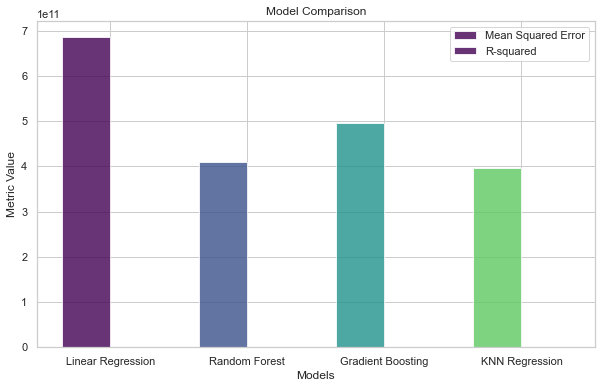

In [336]:
X = df[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Median Household Income']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a seed for reproducibility
np.random.seed(42)

# Create and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Create and fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Create and fit the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Compare MSE and R-squared
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'KNN Regression']
mse_values = [mean_squared_error(y_test, y_pred_linear),
              mean_squared_error(y_test, y_pred_rf),
              mean_squared_error(y_test, y_pred_gb),
              mean_squared_error(y_test, y_pred_knn)]

r2_values = [r2_score(y_test, y_pred_linear),
             r2_score(y_test, y_pred_rf),
             r2_score(y_test, y_pred_gb),
             r2_score(y_test, y_pred_knn)]

# Create a DataFrame for comparison
model_comparison = pd.DataFrame({'Model': models, 'Mean Squared Error': mse_values, 'R-squared': r2_values})

# Print the results
print(model_comparison)

# Visualize the comparison with color
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8
colors = plt.cm.viridis(np.arange(len(models)) / len(models))  # Use a colormap for different colors

bar1 = ax.bar(np.arange(len(models)), model_comparison['Mean Squared Error'], bar_width, alpha=opacity, color=colors, label='Mean Squared Error')
bar2 = ax.bar(np.arange(len(models)) + bar_width, model_comparison['R-squared'], bar_width, alpha=opacity, color=colors, label='R-squared')

ax.set_xlabel('Models')
ax.set_ylabel('Metric Value')
ax.set_title('Model Comparison')
ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()

#### Ranking 

In [337]:
from tabulate import tabulate

# Data
data = [
    ["KNN Regression", 3.97e+11, 0.63],
    ["Random Forest", 4.10e+11, 0.62],
    ["Gradient Boosting", 4.96e+11, 0.54],
    ["Linear Regression", 6.87e+11, 0.36]
]

# Table headers
headers = ["Model", "Mean Squared Error", "R-squared"]

# Create and print the table
table = tabulate(data, headers=headers, tablefmt="grid")
print(table)


+-------------------+----------------------+-------------+
| Model             |   Mean Squared Error |   R-squared |
+===================+======================+=============+
| KNN Regression    |             3.97e+11 |        0.63 |
+-------------------+----------------------+-------------+
| Random Forest     |             4.1e+11  |        0.62 |
+-------------------+----------------------+-------------+
| Gradient Boosting |             4.96e+11 |        0.54 |
+-------------------+----------------------+-------------+
| Linear Regression |             6.87e+11 |        0.36 |
+-------------------+----------------------+-------------+


## Conclusion

**Based on these results, the KNN Regression model appears to have the lowest Mean Squared Error and the highest R-squared, suggesting better predictive performance. Therefore, the KNN Regression model might be considered the best among the evaluated models for this specific dataset. This ranking is based on the Mean Squared Error (lower is better) and R-squared (higher is better) values.**